# Basic Library Import

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.style.use('classic')
pd.set_option('display.max_columns',30)

## Import Google Play Store

In [324]:
df=pd.read_csv('googleplaystore.csv')

In [325]:
df.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

  Reviews Size  Installs  Type Price Content Rating  \
0     159  19M   10,000+  Free     0       Everyone   
1     967  14M  500,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up

In [326]:
df.tail(2)

App             Category  \
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10839     Mature 17+  Books & Reference  January 19, 2015  Varies with device   
10840       Everyone          Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
10839  Varies with device  
10840  Varies with device

In [377]:
df.shape

(10357, 13)

In [328]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [330]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [331]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [332]:
df.describe(include='O')

App Category Reviews                Size    Installs   Type  Price  \
count    10841    10841   10841               10841       10841  10840  10841   
unique    9660       34    6002                 462          22      3     93   
top     ROBLOX   FAMILY       0  Varies with device  1,000,000+   Free      0   
freq         9     1972     596                1695        1579  10039  10040   

       Content Rating Genres    Last Updated         Current Ver Android Ver  
count           10840  10841           10841               10833       10838  
unique              6    120            1378                2832          33  
top          Everyone  Tools  August 3, 2018  Varies with device  4.1 and up  
freq             8714    842             326                1459        2451

## Null Check

In [333]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Drop Null rows and null Columns

In [378]:
df.dropna(axis=1,how='all',inplace=True)
df.dropna(axis=0,how='all',inplace=True)
df.shape

(10357, 13)

## Duplicate Check

In [334]:
df[df.duplicated()]

App      Category  Rating  \
229                       Quick PDF Scanner + OCR FREE      BUSINESS     4.2   
236                                                Box      BUSINESS     4.2   
239                                 Google My Business      BUSINESS     4.4   
256                                ZOOM Cloud Meetings      BUSINESS     4.4   
261                          join.me - Simple Meetings      BUSINESS     4.0   
...                                                ...           ...     ...   
8643                    Wunderlist: To-Do List & Tasks  PRODUCTIVITY     4.6   
8654   TickTick: To Do List with Reminder, Day Planner  PRODUCTIVITY     4.6   
8658                           ColorNote Notepad Notes  PRODUCTIVITY     4.6   
10049        Airway Ex - Intubate. Anesthetize. Train.       MEDICAL     4.3   
10768                                             AAFP       MEDICAL     3.8   

       Reviews                Size      Installs  Type Price Content Rating  \
229      80805  Varies with device    5,000,000+  Free     0       Everyone   
236     159872  Varies with device   10,000,000+  Free     0       Everyone   
239      70991  Varies with device    5,000,000+  Free     0       Everyone   
256      31614                 37M   10,000,000+  Free     0       Everyone   
261       6989  Varies with device    1,000,000+  Free     0       Everyone   
...        ...                 ...           ...   ...   ...            ...   
8643    404610  Varies with device   10,000,000+  Free     0       Everyone   
8654     25370  Varies with device    1,000,000+  Free     0       Everyone   
8658   2401017  Varies with device  100,000,000+  Free     0       Everyone   
10049      123                 86M       10,000+  Free     0       Everyone   
10768       63                 24M       10,000+  Free     0       Everyone   

             Genres       Last Updated         Current Ver         Android Ver  
229        Business  February 26, 2018  Varies with device        4.0.3 and up  
236        Business      July 31, 2018  Varies with device  Varies with device  
239        Business      July 24, 2018    2.19.0.204537701          4.4 and up  
256        Business      July 20, 2018      4.1.28165.0716          4.0 and up  
261        Business      July 16, 2018           4.3.0.508          4.4 and up  
...             ...                ...                 ...                 ...  
8643   Productivity      April 6, 2018  Varies with device  Varies with device  
8654   Productivity     August 6, 2018  Varies with device  Varies with device  
8658   Productivity      June 27, 2018  Varies with device  Varies with device  
10049       Medical       June 1, 2018              0.6.88          5.0 and up  
10768       Medical      June 22, 2018               2.3.1          5.0 and up  

[483 rows x 13 columns]

In [335]:
df.duplicated().sum()

483

In [336]:
df.drop_duplicates(inplace=True)

In [337]:
df.duplicated().sum()

0

## Data Cleaning

In [338]:
# Insight:
'''
1. 'Reviews' feature is a int datatype but in dataframe is shown as object
2. 'Size' feature is a float datatype but in dataframe is shown as object
3. 'Installs' feature is a float datatype but in dataframe is shown as object
4. 'Price' feature is a float datatype but in dataframe is shown as object
'''

"\n1. 'Reviews' feature is a int datatype but in dataframe is shown as object\n2. 'Size' feature is a float datatype but in dataframe is shown as object\n3. 'Installs' feature is a float datatype but in dataframe is shown as object\n4. 'Price' feature is a float datatype but in dataframe is shown as object\n"

In [339]:
df_copy=df

#### 'Reviews' Feature Cleaning

In [340]:
df_copy.Reviews[0:5]

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [341]:
df_copy['Reviews'].dtypes

dtype('O')

In [342]:
df_copy[~df_copy.Reviews.str.isnumeric()]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [343]:
df_copy[~df_copy['Reviews'].apply(lambda x:x.isnumeric())]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [344]:
df_copy['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10358, dtype: object

In [345]:
df_copy['Reviews'] = df_copy['Reviews'].replace({'3.0M': '3000000'})

In [346]:
df_copy.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                           3000000
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [347]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [348]:
df_copy.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### 'Size' Feature Cleaning

In [349]:
df_copy['Size'].apply(lambda x:str(x)[-1]).unique()

array(['M', 'e', 'k', '+'], dtype=object)

In [350]:
df_copy['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10358, dtype: object

In [351]:
def size_process(size_element):
    if str(size_element)[-1]=='M':
        result=float(str(size_element).replace('M',''))
        result=result*1000000
        return result
    elif str(size_element)[-1]=='k':
        result=float(str(size_element).replace('k',''))
        result=result*1000
        return result
    elif str(size_element)[-1]=='k':
        result=float(str(size_element).replace('+',''))
        return result
    elif str(size_element)=='Varies with device':
        result=float(str(size_element).replace('Varies with device',str(np.NaN)))
        return result

In [352]:
df_copy['Size']=df_copy['Size'].apply(lambda x:size_process(x))

In [353]:
df_copy['Size'].apply(lambda x:str(x)[-1]).unique()

array(['0', 'n', '9', '1', '5'], dtype=object)

In [354]:
df_copy['Size']=df_copy['Size'].astype(float)

In [355]:
df_copy['Size'].dtypes

dtype('float64')

#### 'Installs' Feature Cleaning

In [356]:
df_copy['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10358, dtype: object

In [357]:
df_copy['Installs']=df_copy['Installs'].str.replace(',','').str.replace('+','')

In [358]:
df_copy['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10358, dtype: object

In [359]:
df_copy[df_copy['Installs']=='Free']

App Category  Rating  Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0  3000000   

       Size Installs Type     Price Content Rating             Genres  \
10472   NaN     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [360]:
df.drop(10472,axis=0,inplace=True)

In [361]:
df.loc[10471:10473,:]

App         Category  Rating  Reviews       Size  \
10471         Xposed Wi-Fi-Pwd  PERSONALIZATION     3.5     1042   404000.0   
10473  osmino Wi-Fi: free WiFi            TOOLS     4.2   134203  4100000.0   

       Installs  Type Price Content Rating           Genres    Last Updated  \
10471    100000  Free     0       Everyone  Personalization  August 5, 2014   
10473  10000000  Free     0       Everyone            Tools  August 7, 2018   

      Current Ver   Android Ver  
10471       3.0.0  4.0.3 and up  
10473     6.06.14    4.4 and up

In [362]:
df.reset_index(inplace=True)

In [363]:
df.loc[10471:10473,:]

Empty DataFrame
Columns: [index, App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [364]:
df.drop(columns=['index'],inplace=True)

In [365]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [366]:
df_copy['Installs']=df_copy['Installs'].astype(int)

In [367]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### 'Price' Feature Cleaning

In [368]:
df_copy['Price'].apply(lambda x:str(x)[0]).unique()

array(['0', '$'], dtype=object)

In [369]:
df_copy['Price']=df_copy['Price'].str.replace('$','')

In [370]:
df_copy['Price'].apply(lambda x:str(x)[0]).unique()

array(['0', '4', '3', '6', '1', '2', '7', '5', '9', '8'], dtype=object)

In [371]:
df_copy['Price']=df_copy['Price'].astype(float)

In [372]:
df_copy['Price'].dtypes

dtype('float64')

In [373]:
df_copy.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Separate Numerical and Categorical Features:

In [376]:
cat_features=[features for features in df_copy.columns if df_copy[features].dtypes=='object']
num_features=[features for features in df_copy.columns if df_copy[features].dtypes!='object']
print("Categorical features are ",cat_features)
print("Numerical features are ",num_features)

Categorical features are  ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
Numerical features are  ['Rating', 'Reviews', 'Size', 'Installs', 'Price']


### Unique count and values of categorical features:

In [380]:
for feature in cat_features:
    print(f'{feature} has {len(df_copy[feature].unique())} categorical features')

App has 9659 categorical features
Category has 33 categorical features
Type has 3 categorical features
Content Rating has 6 categorical features
Genres has 119 categorical features
Last Updated has 1377 categorical features
Current Ver has 2832 categorical features
Android Ver has 34 categorical features


### Univariant Analysis

#### Value_counts() for all categorical features

In [392]:
for features in cat_features:
    print(f'Value count for feature {features}')
    print(df_copy[features].value_counts(normalize=True)*100)
    print()
    print()

Value count for feature App
App
ROBLOX                                           0.086898
8 Ball Pool                                      0.067587
Bubble Shooter                                   0.057932
Helix Jump                                       0.057932
Zombie Catchers                                  0.057932
                                                   ...   
Popsicle Launcher for Android P 9.0 launcher     0.009655
PixelLab - Text on pictures                      0.009655
P Launcher for Android™ 9.0                      0.009655
Pacify (Android P theme) - Theme for Xperia™     0.009655
iHoroscope - 2018 Daily Horoscope & Astrology    0.009655
Name: proportion, Length: 9659, dtype: float64


Value count for feature Category
Category
FAMILY                 18.760259
GAME                   10.823598
TOOLS                   8.139423
BUSINESS                4.122815
MEDICAL                 3.939365
PRODUCTIVITY            3.929709
PERSONALIZATION         3.746259
LIFESTYL

#### Count plot for all categorical features

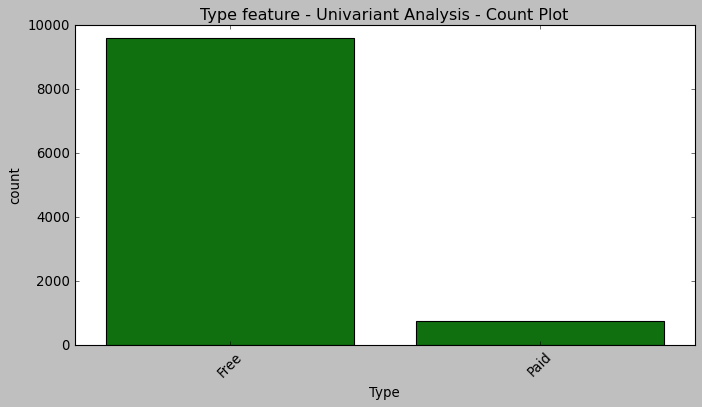

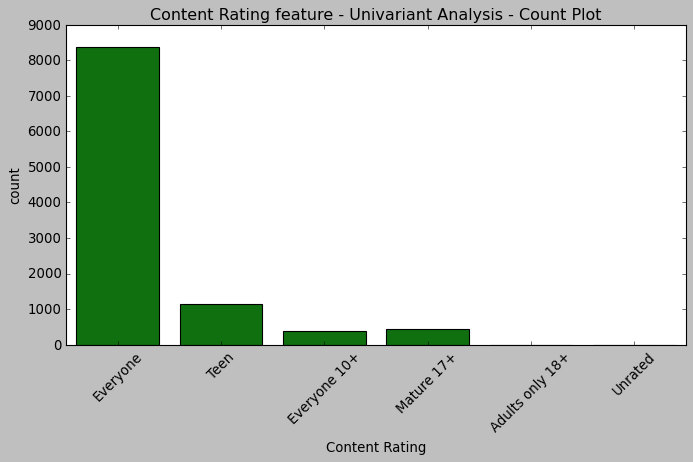

In [393]:
for features in cat_features:
    if len(df_copy[features].unique())<=10:
        plt.figure(figsize=(10,5))
        sns.countplot(x=df_copy[features],color='g')
        plt.xticks(rotation=45)
        plt.title(f'{features} feature - Univariant Analysis - Count Plot')
        plt.show()

In [402]:
num_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

#### Histogram Plot for all Numerical features

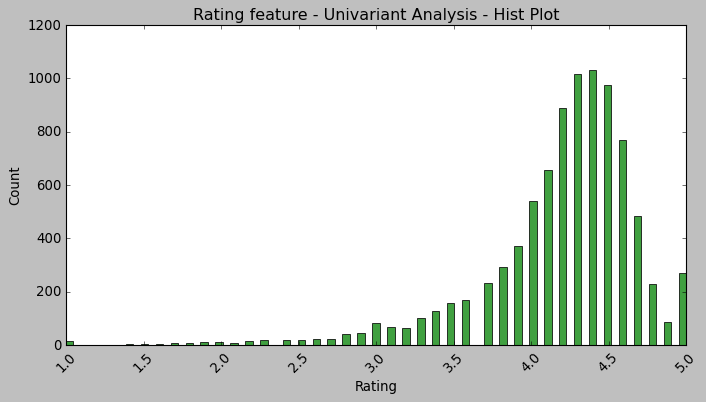

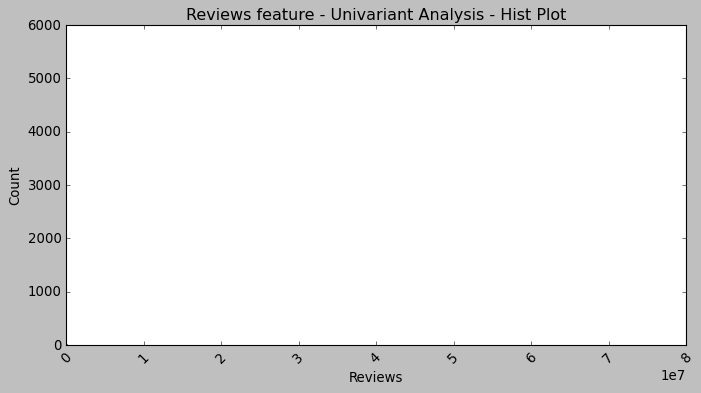

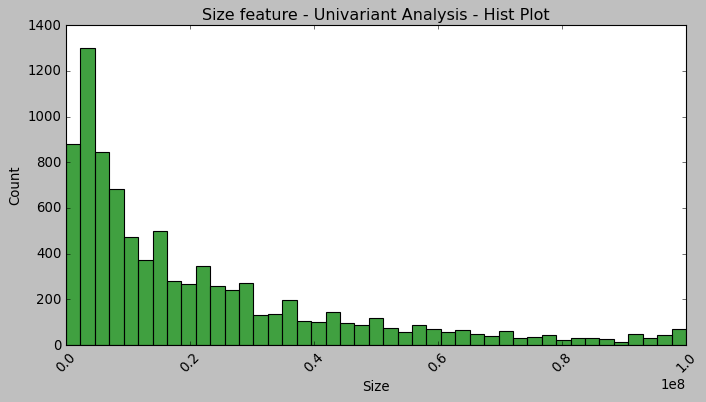

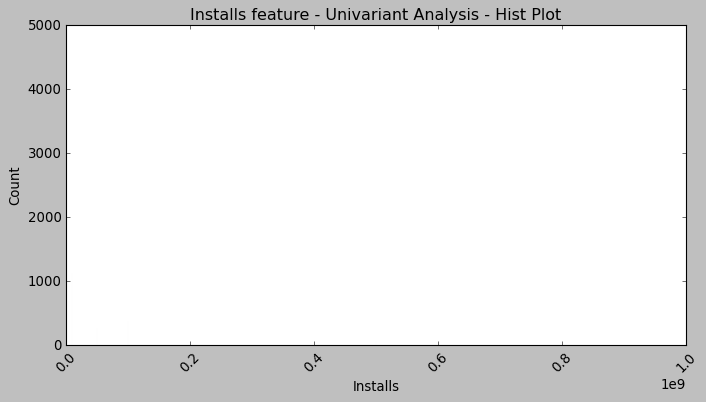

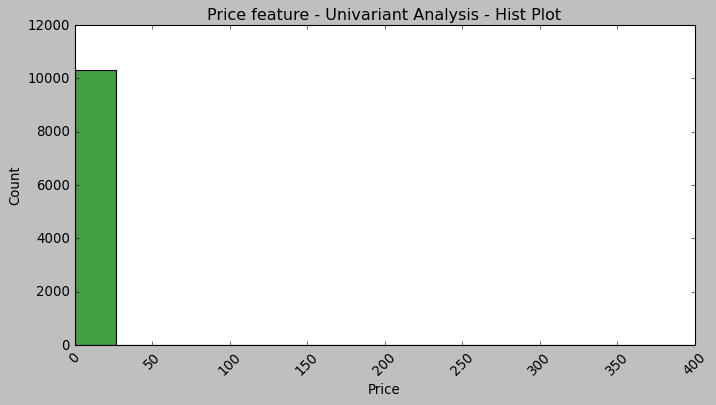

In [401]:
for features in num_features:
    plt.figure(figsize=(10,5))
    sns.histplot(x=df_copy[features],color='g')
    plt.xticks(rotation=45)
    plt.title(f'{features} feature - Univariant Analysis - Hist Plot')
    plt.show()

#### Dist Plot for all Numerical features

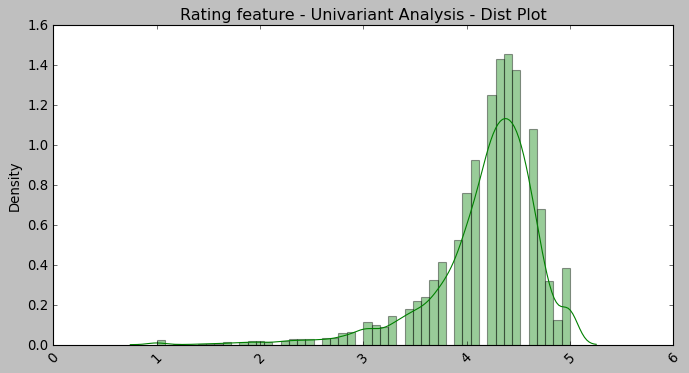

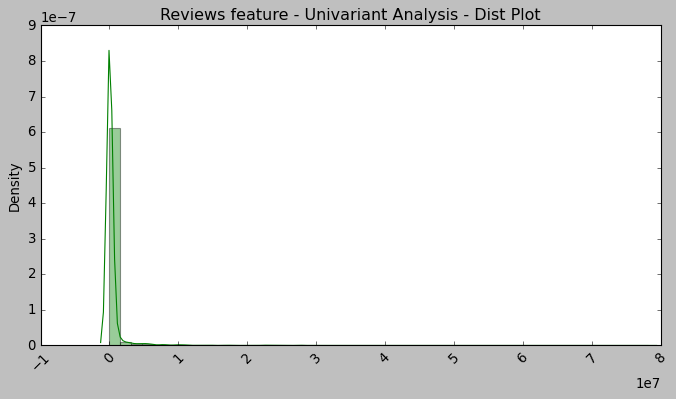

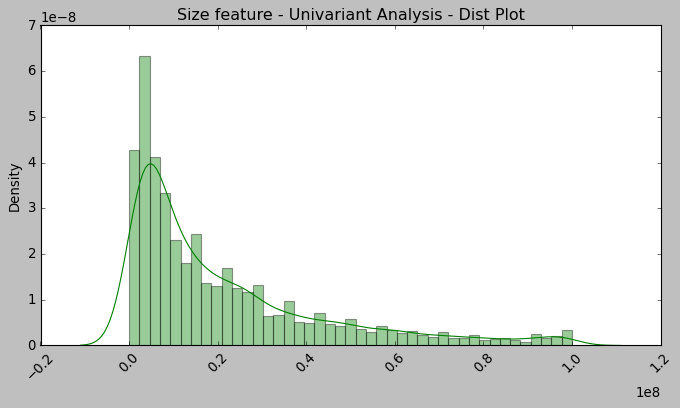

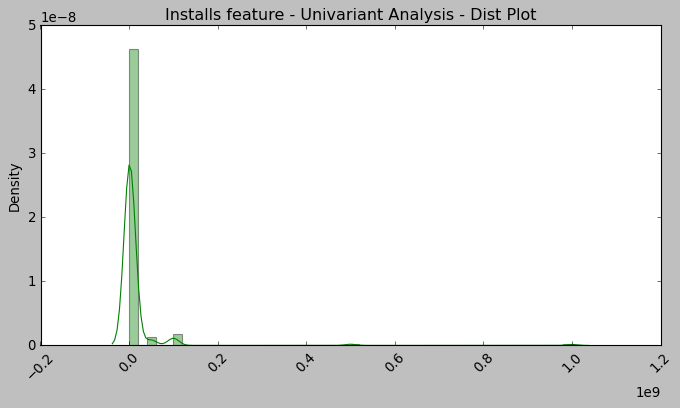

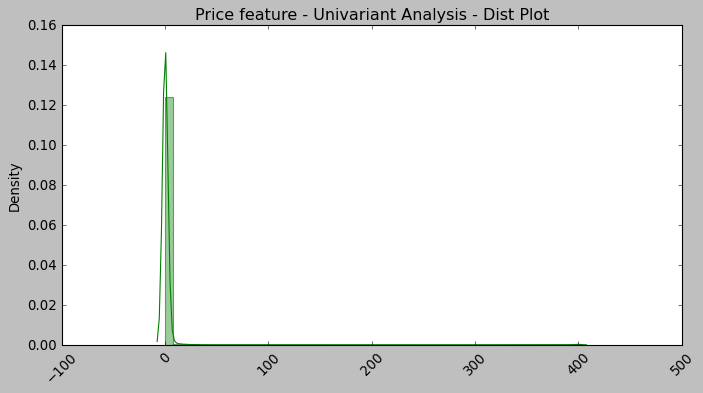

In [409]:
for features in num_features:
    plt.figure(figsize=(10,5))
    sns.distplot(x=df_copy[features],color='g',kde=True)
    plt.xticks(rotation=45)
    plt.title(f'{features} feature - Univariant Analysis - Dist Plot')
    plt.show()

#### KDE plot for all numerical features

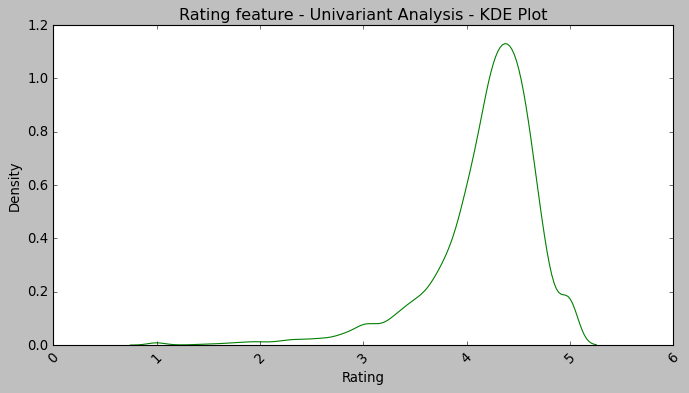

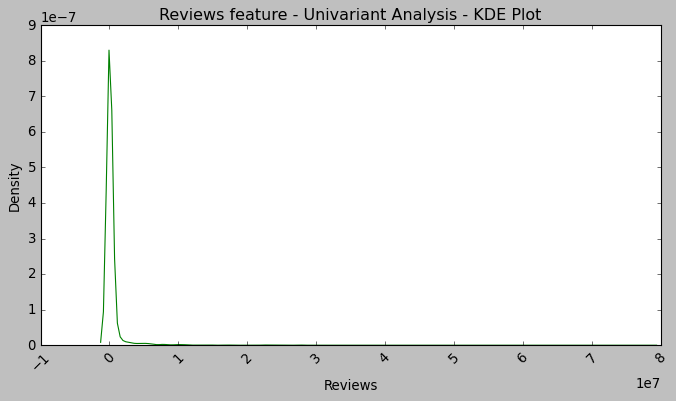

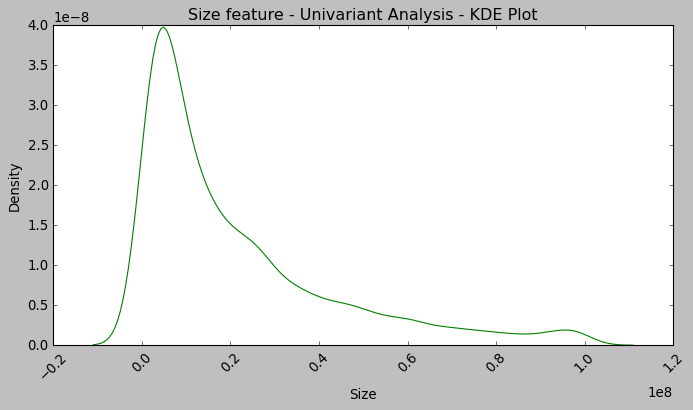

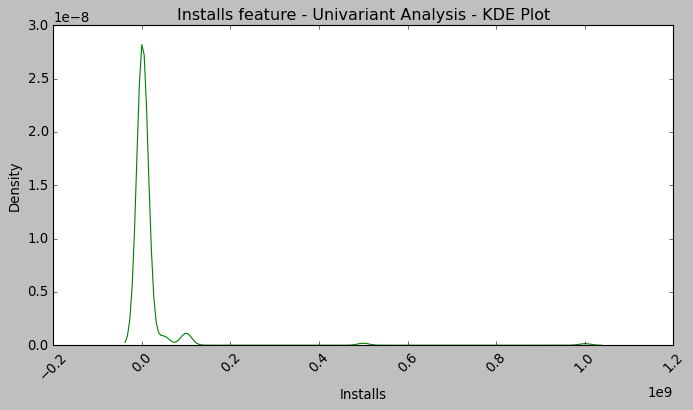

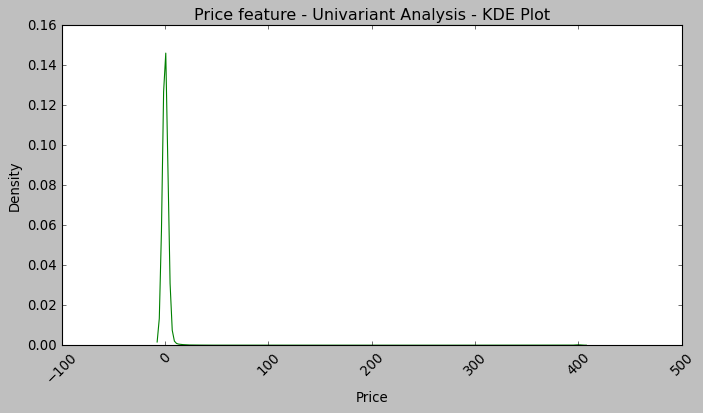

In [411]:
for features in num_features:
    plt.figure(figsize=(10,5))
    sns.kdeplot(x=df_copy[features],color='g')
    plt.xticks(rotation=45)
    plt.title(f'{features} feature - Univariant Analysis - KDE Plot')
    plt.show()

### Bivariant Analysis

#### Bar plot for all categorical features with each numerical feature

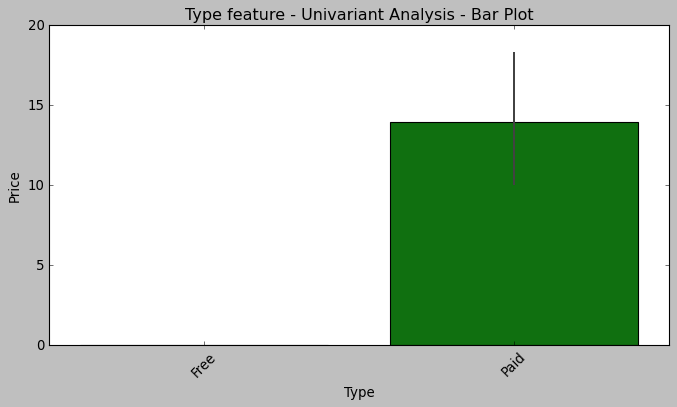

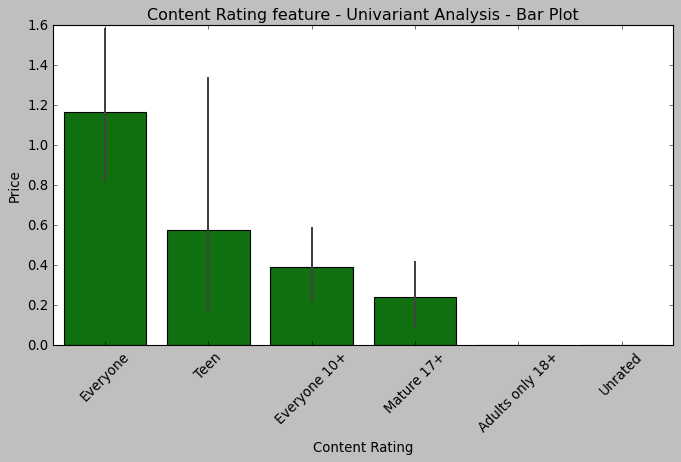

In [398]:
for features in cat_features:
    if len(df_copy[features].unique())<=10:
        plt.figure(figsize=(10,5))
        sns.barplot(x=df_copy[features],y=df_copy['Price'],color='g')
        plt.xticks(rotation=45)
        plt.title(f'{features} feature - Univariant Analysis - Bar Plot')
        plt.show()

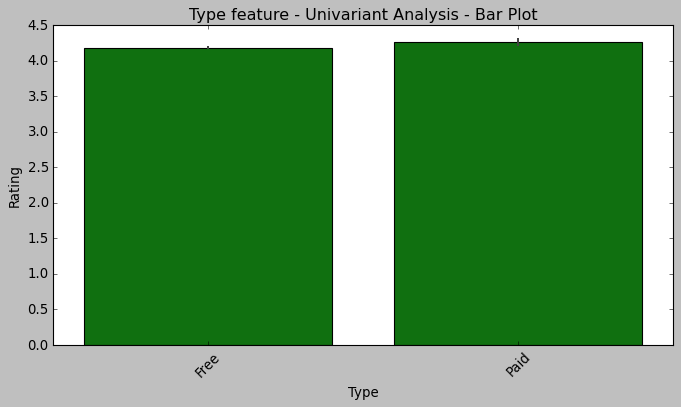

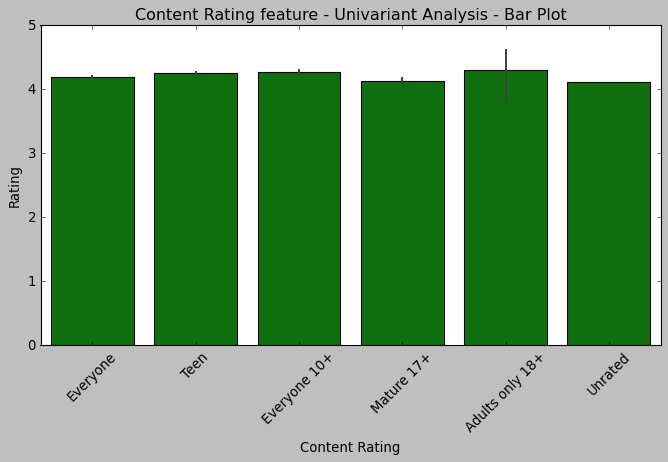

In [413]:
for features in cat_features:
    if len(df_copy[features].unique())<=10:
        plt.figure(figsize=(10,5))
        sns.barplot(x=df_copy[features],y=df_copy['Rating'],color='g')
        plt.xticks(rotation=45)
        plt.title(f'{features} feature - Univariant Analysis - Bar Plot')
        plt.show()

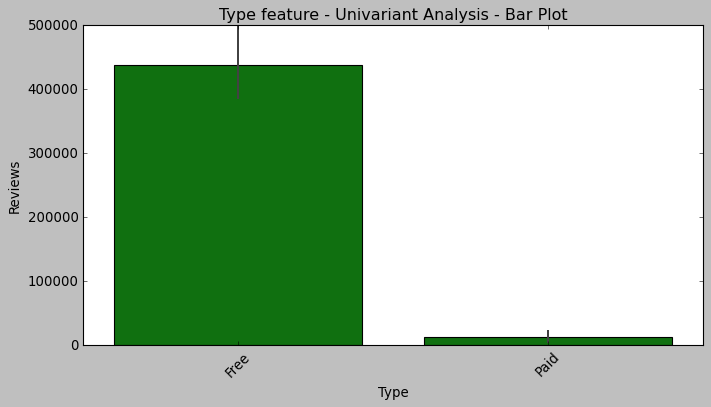

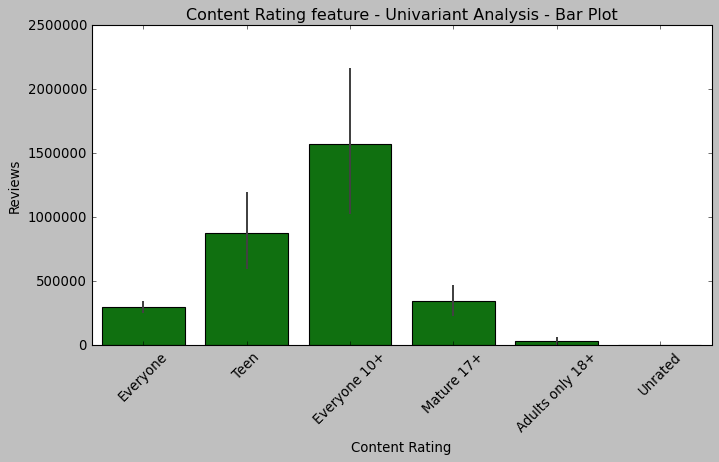

In [415]:
for features in cat_features:
    if len(df_copy[features].unique())<=10:
        plt.figure(figsize=(10,5))
        sns.barplot(x=df_copy[features],y=df_copy['Reviews'],color='g')
        plt.xticks(rotation=45)
        plt.title(f'{features} feature - Univariant Analysis - Bar Plot')
        plt.show()

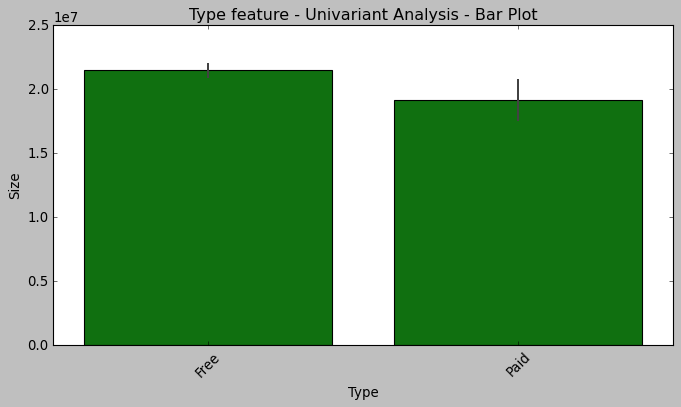

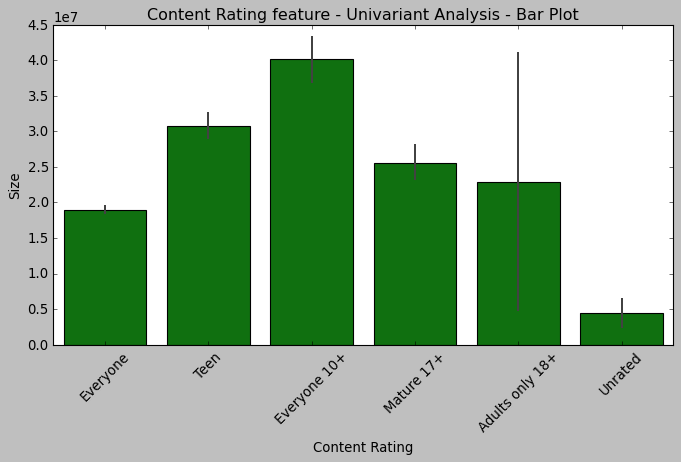

In [416]:
for features in cat_features:
    if len(df_copy[features].unique())<=10:
        plt.figure(figsize=(10,5))
        sns.barplot(x=df_copy[features],y=df_copy['Size'],color='g')
        plt.xticks(rotation=45)
        plt.title(f'{features} feature - Univariant Analysis - Bar Plot')
        plt.show()

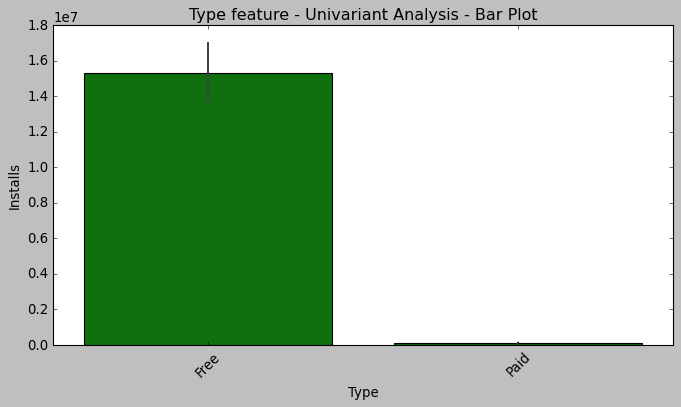

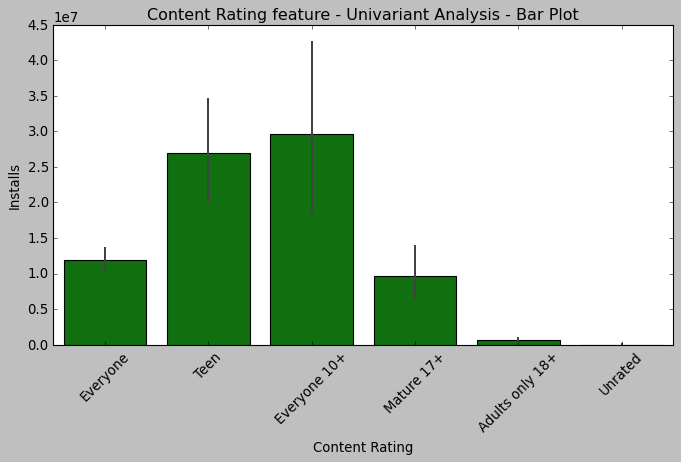

In [417]:
for features in cat_features:
    if len(df_copy[features].unique())<=10:
        plt.figure(figsize=(10,5))
        sns.barplot(x=df_copy[features],y=df_copy['Installs'],color='g')
        plt.xticks(rotation=45)
        plt.title(f'{features} feature - Univariant Analysis - Bar Plot')
        plt.show()

## Multivariant Analysis

### Scatter Plot
1. two numerical features in x and y axis and categorical feature in hue

In [423]:
for feature in cat_features:
    print(f'{feature} has {len(df_copy[feature].unique())} categorical features')

App has 9659 categorical features
Category has 33 categorical features
Type has 3 categorical features
Content Rating has 6 categorical features
Genres has 119 categorical features
Last Updated has 1377 categorical features
Current Ver has 2832 categorical features
Android Ver has 34 categorical features


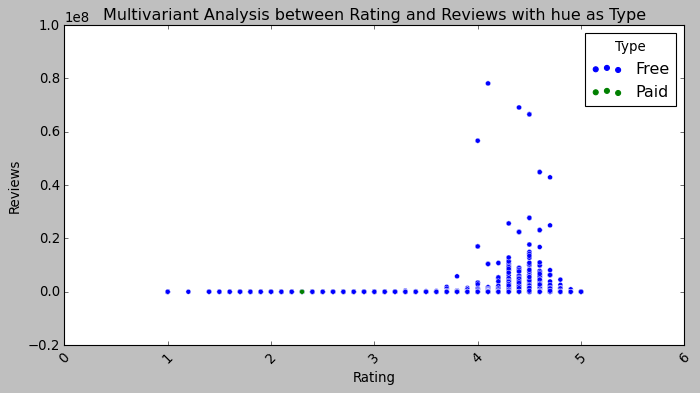

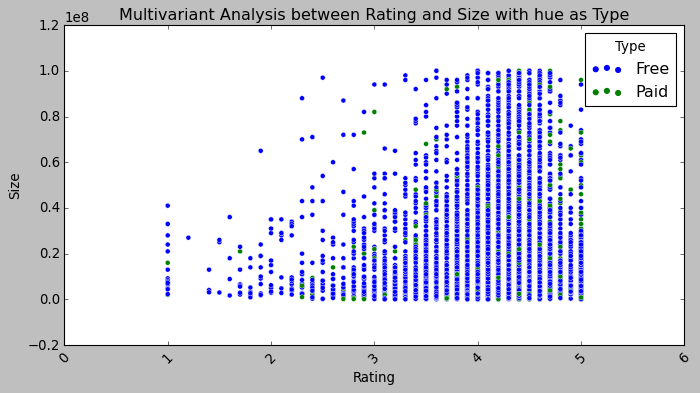

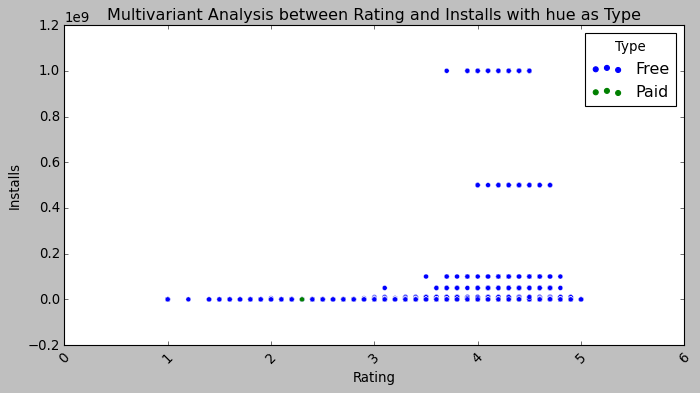

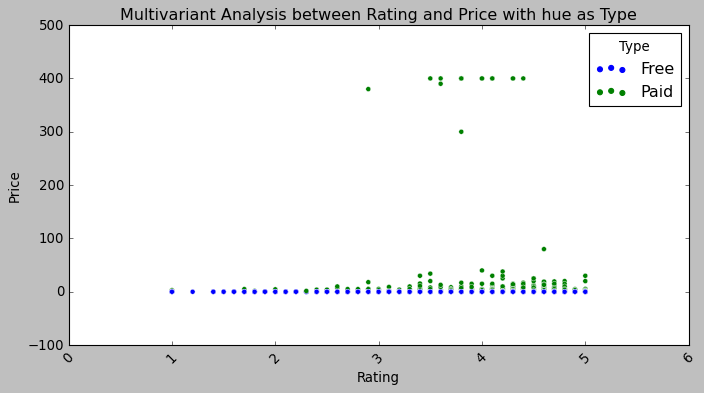

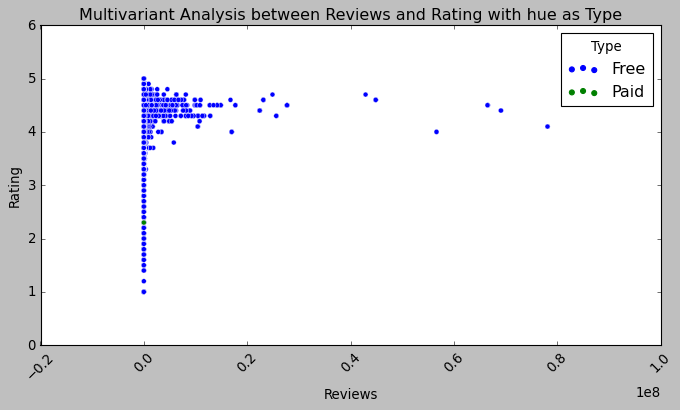

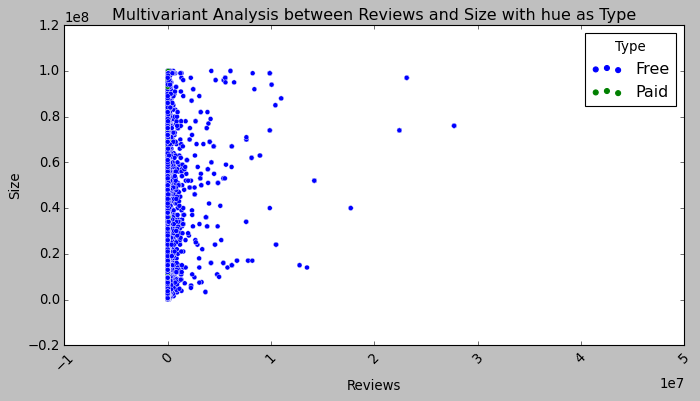

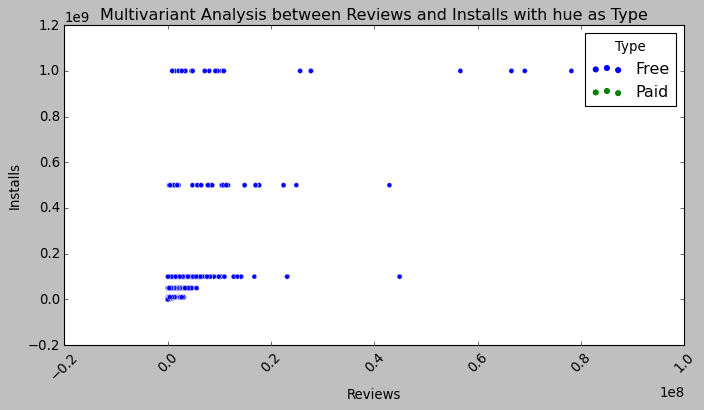

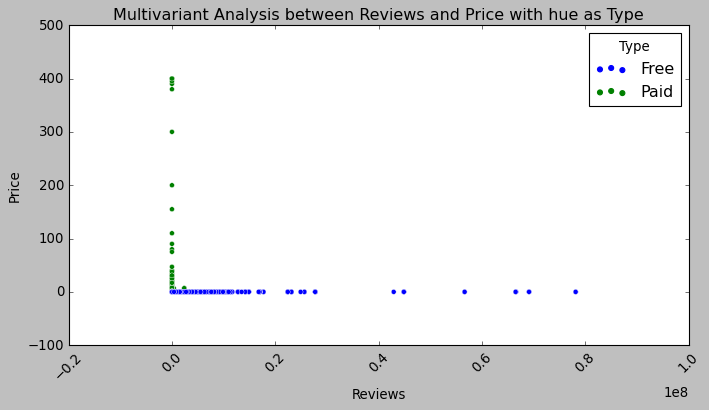

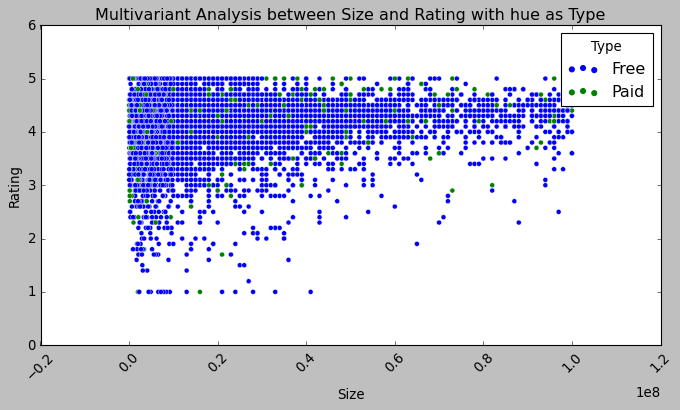

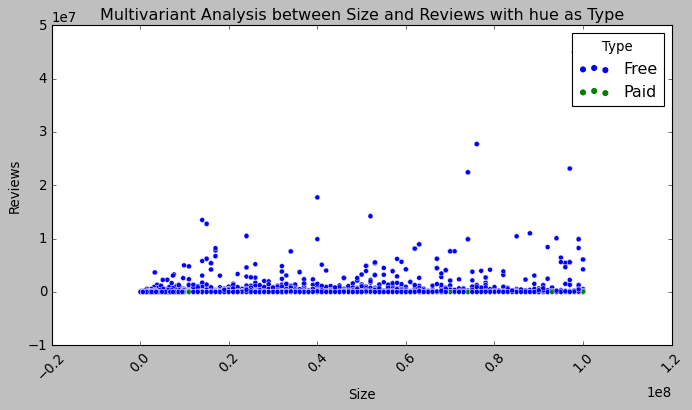

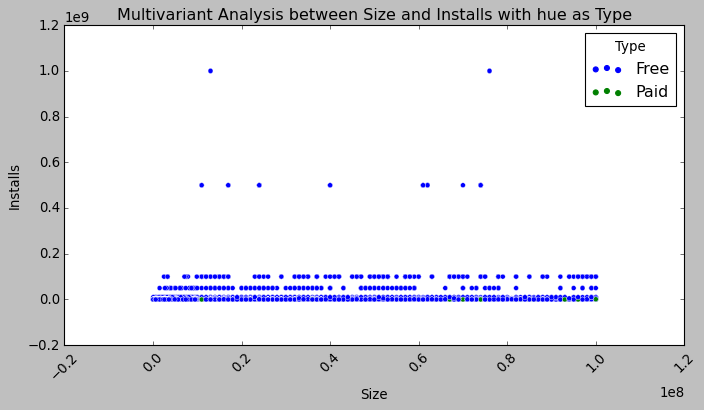

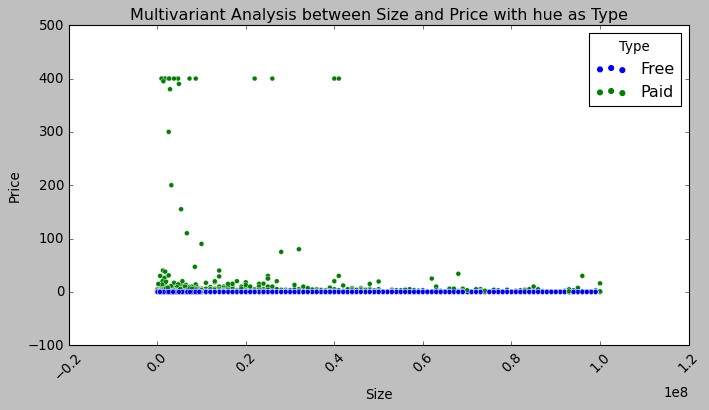

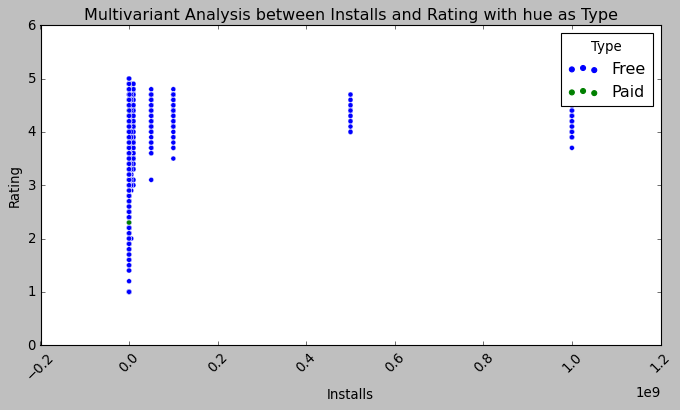

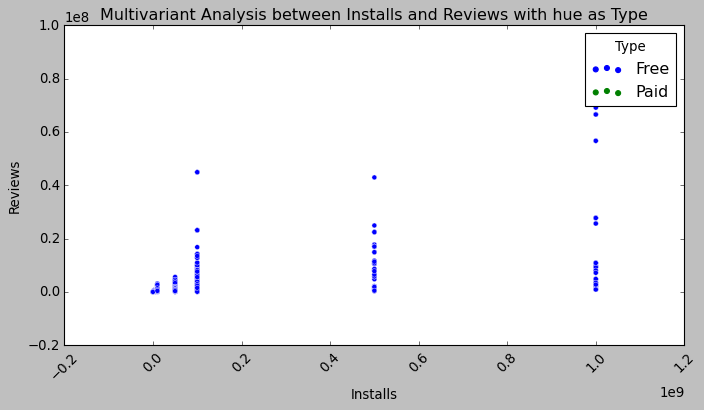

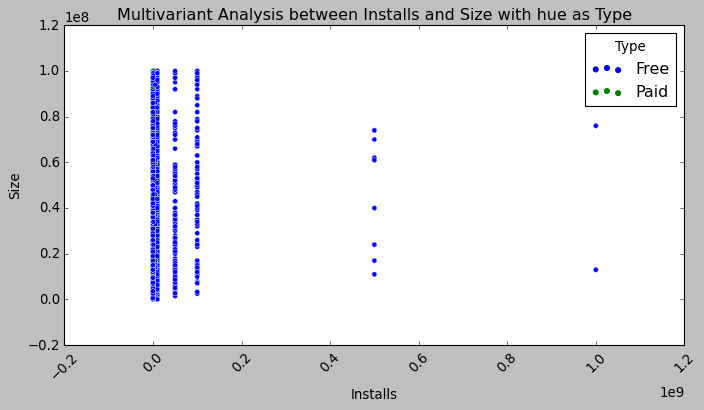

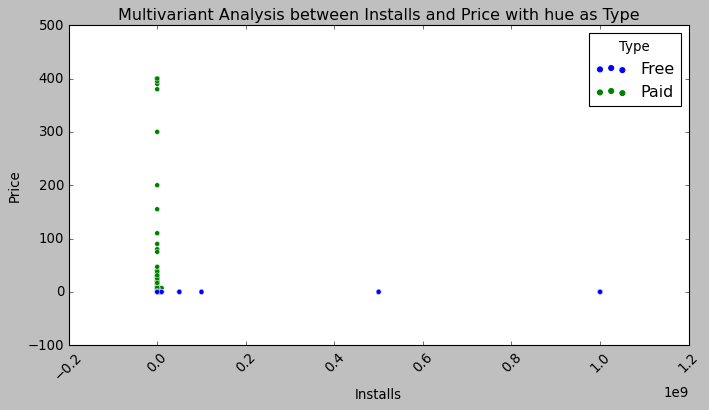

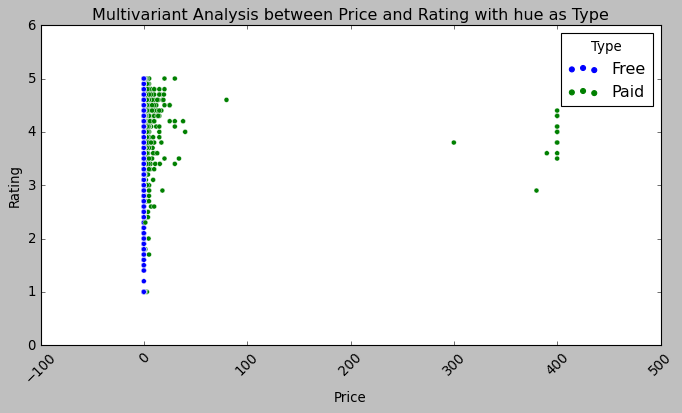

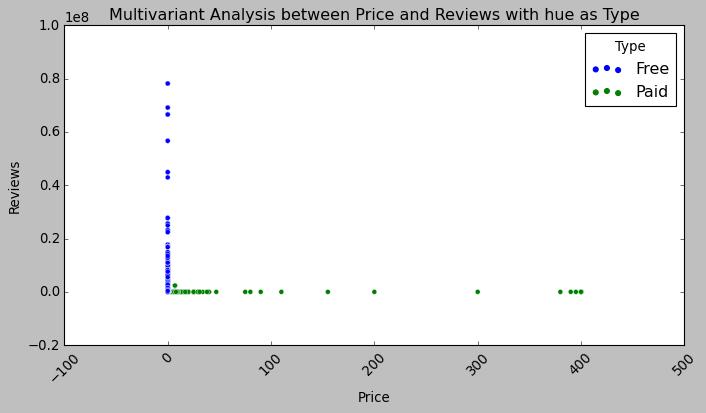

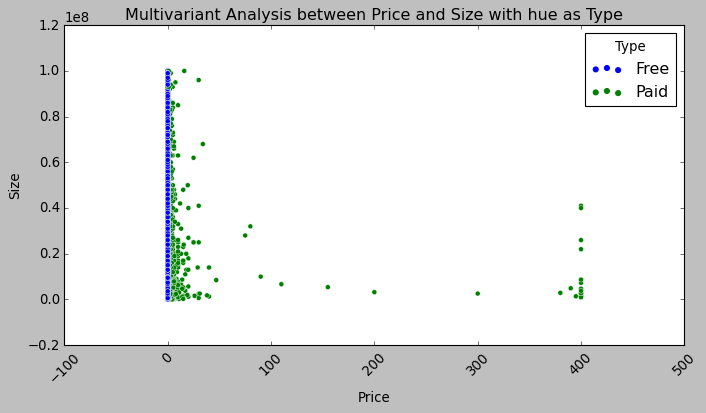

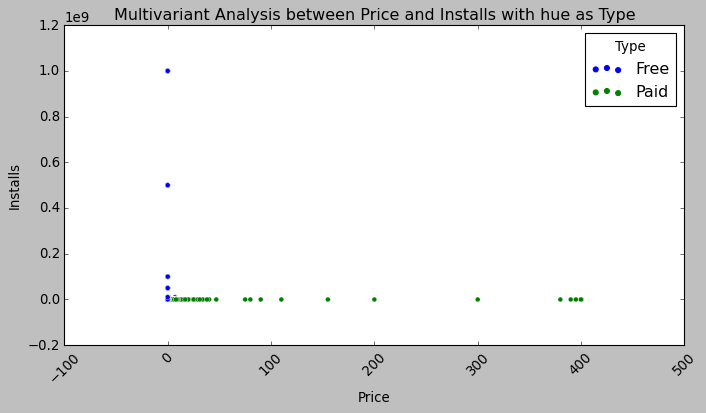

In [424]:
for i in num_features:
    for j in num_features:
        if i!=j:
            plt.figure(figsize=(10,5))
            sns.scatterplot(x=df_copy[i],y=df_copy[j],hue=df_copy['Type'])
            plt.xticks(rotation=45)
            plt.title(f'Multivariant Analysis between {i} and {j} with hue as Type')
            plt.show()

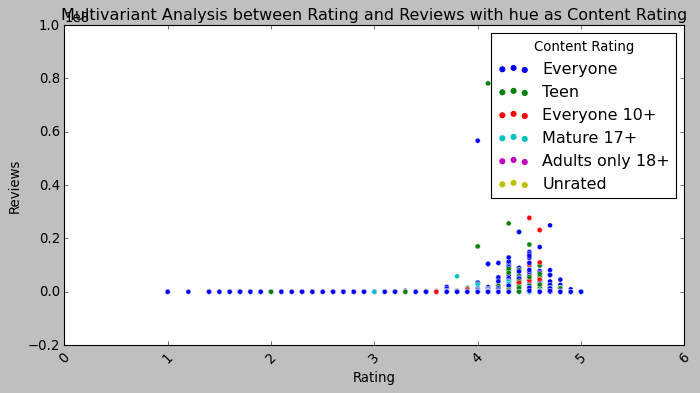

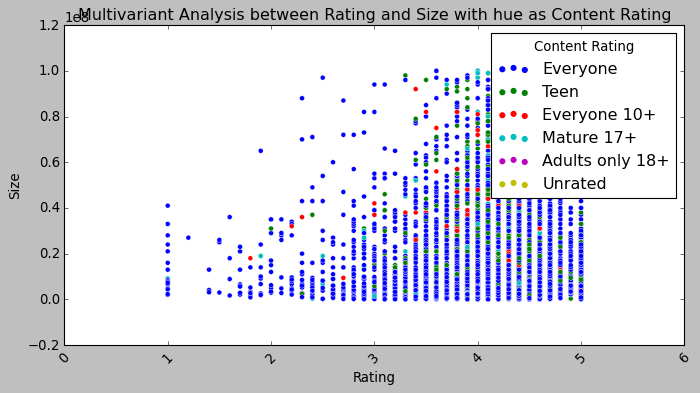

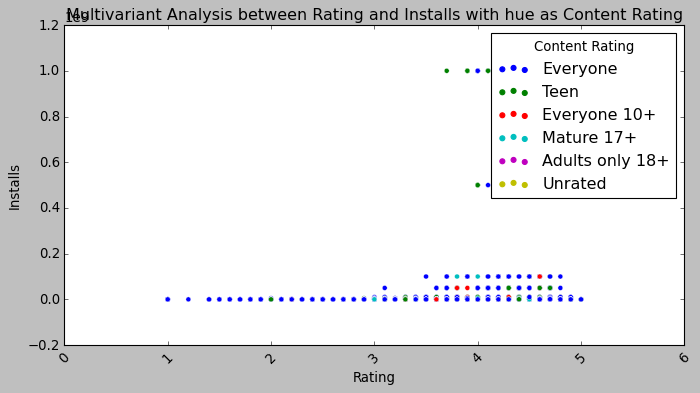

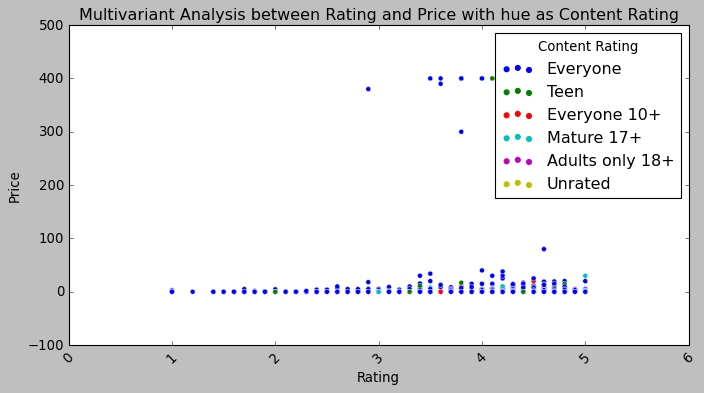

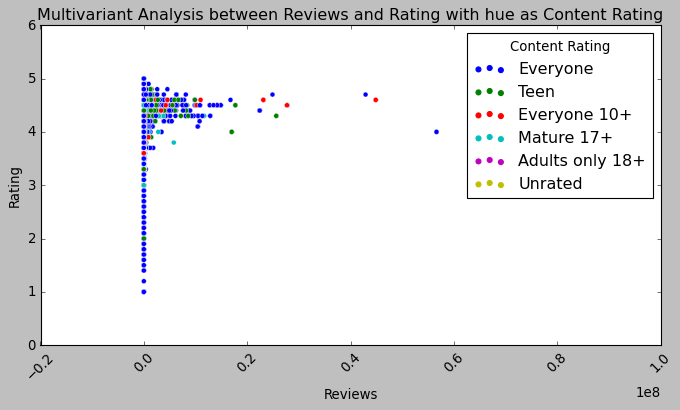

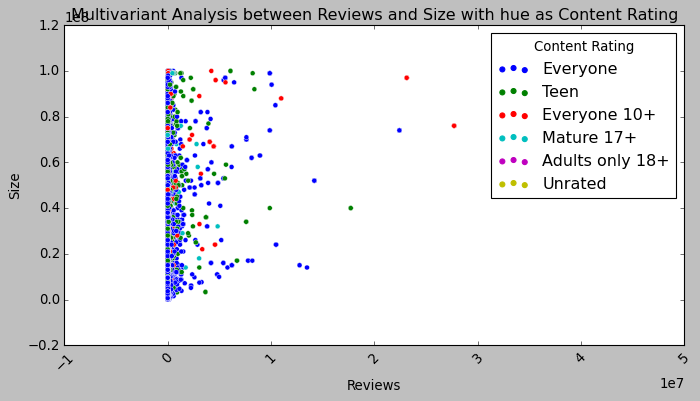

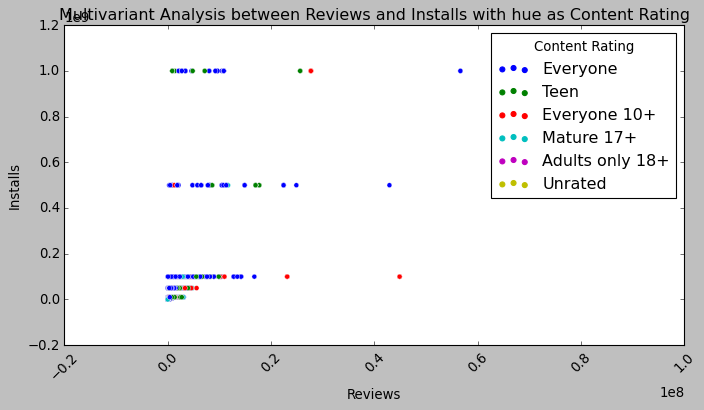

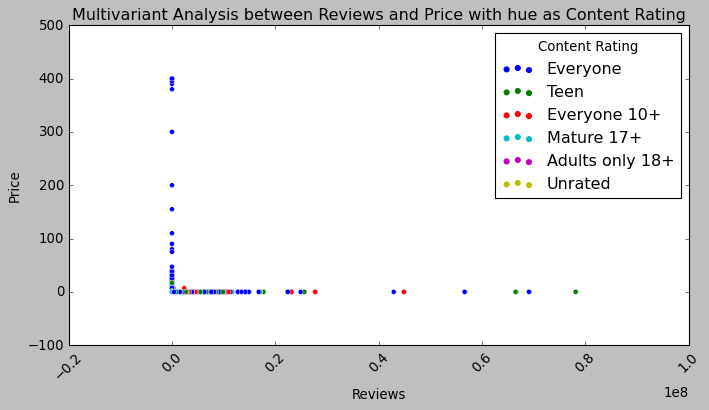

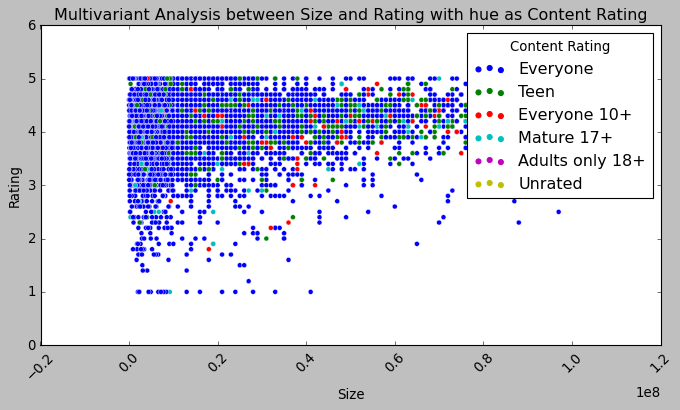

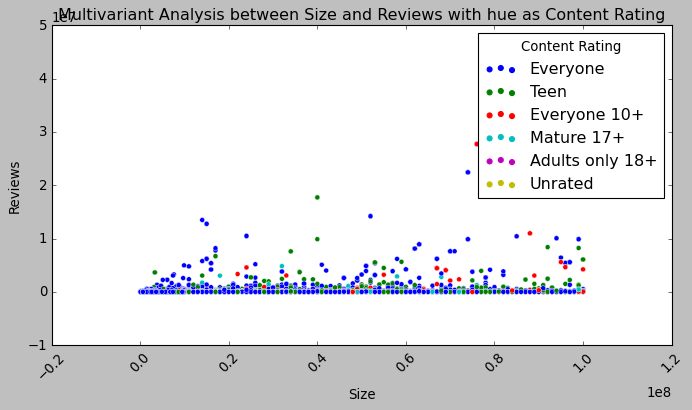

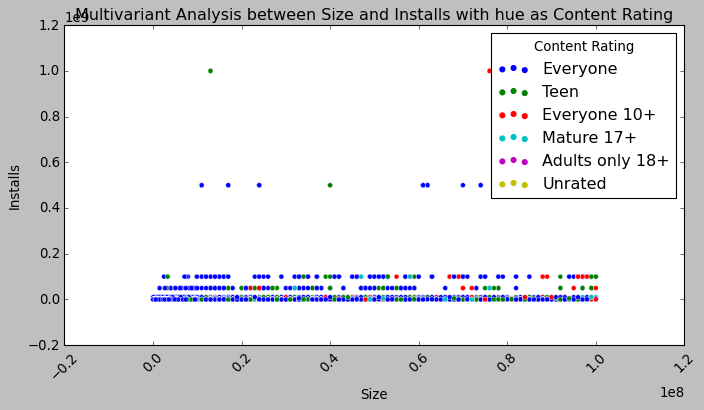

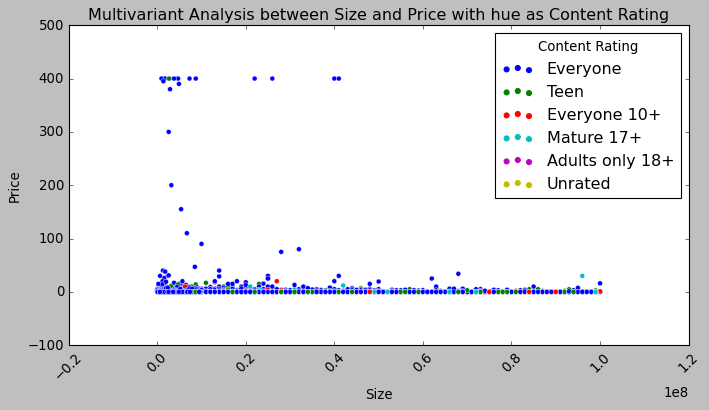

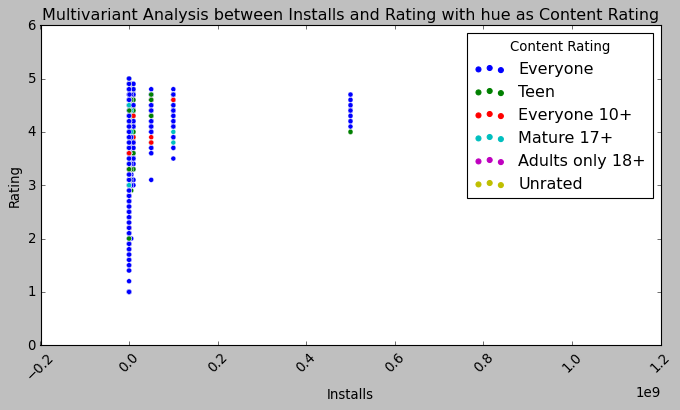

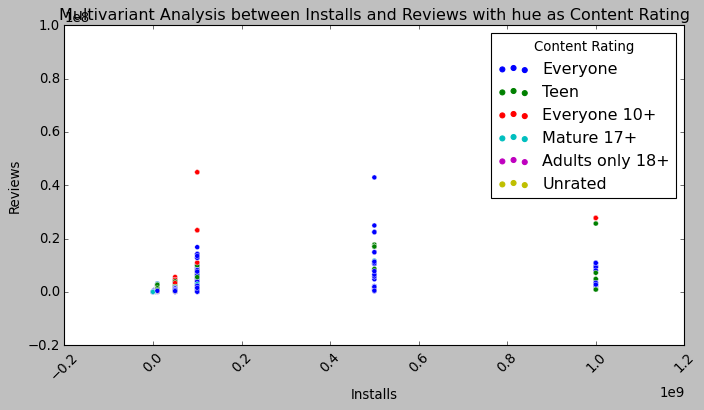

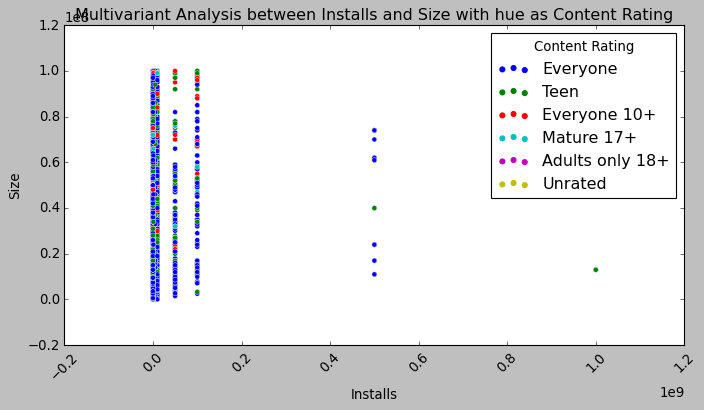

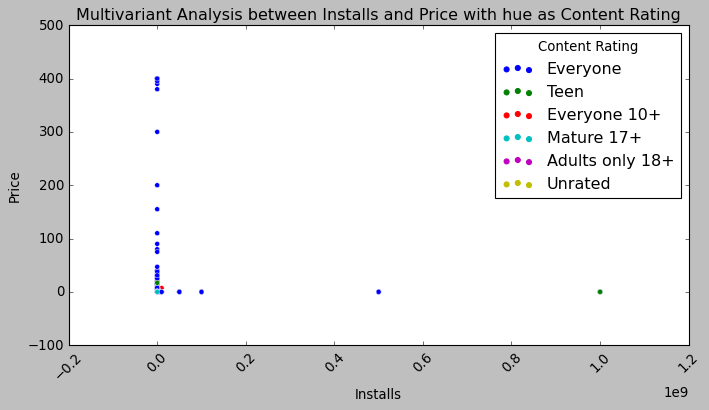

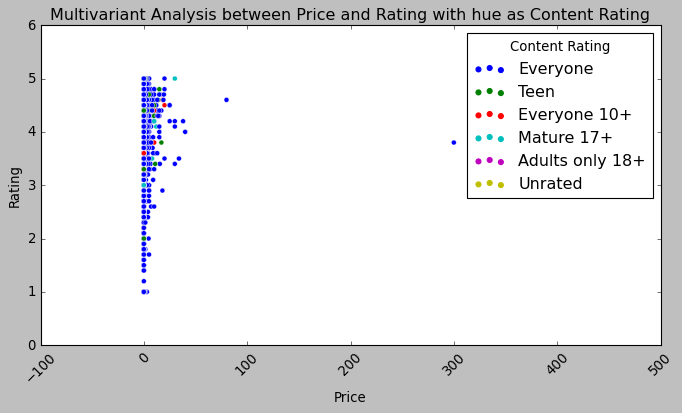

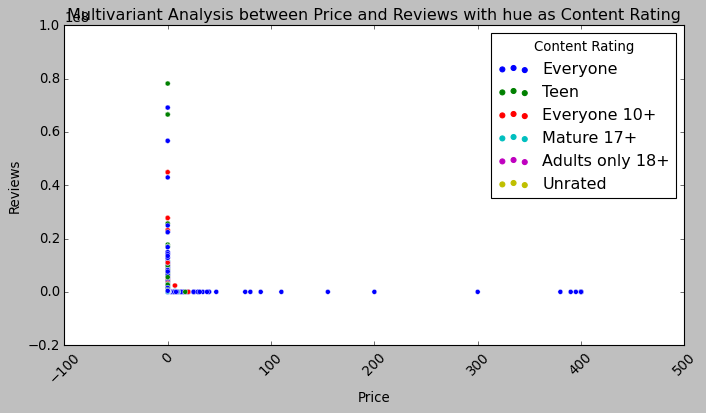

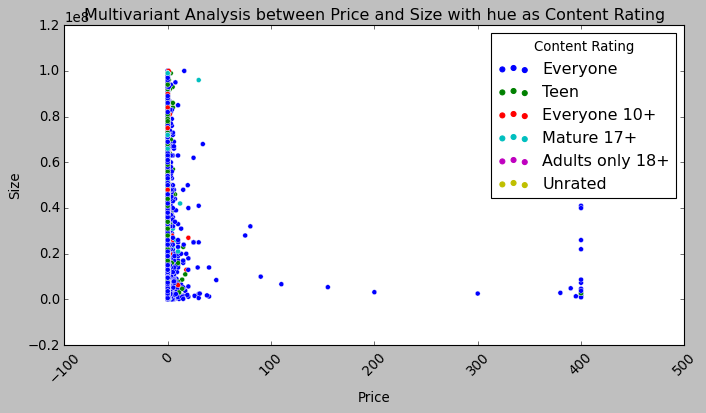

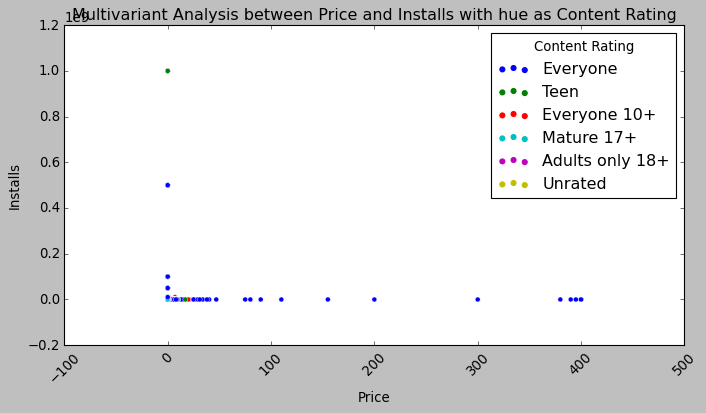

In [425]:
for i in num_features:
    for j in num_features:
        if i!=j:
            plt.figure(figsize=(10,5))
            sns.scatterplot(x=df_copy[i],y=df_copy[j],hue=df_copy['Content Rating'])
            plt.xticks(rotation=45)
            plt.title(f'Multivariant Analysis between {i} and {j} with hue as Content Rating')
            plt.show()

### Pair Plot for all numerical features

<Figure size 2800x2400 with 0 Axes>

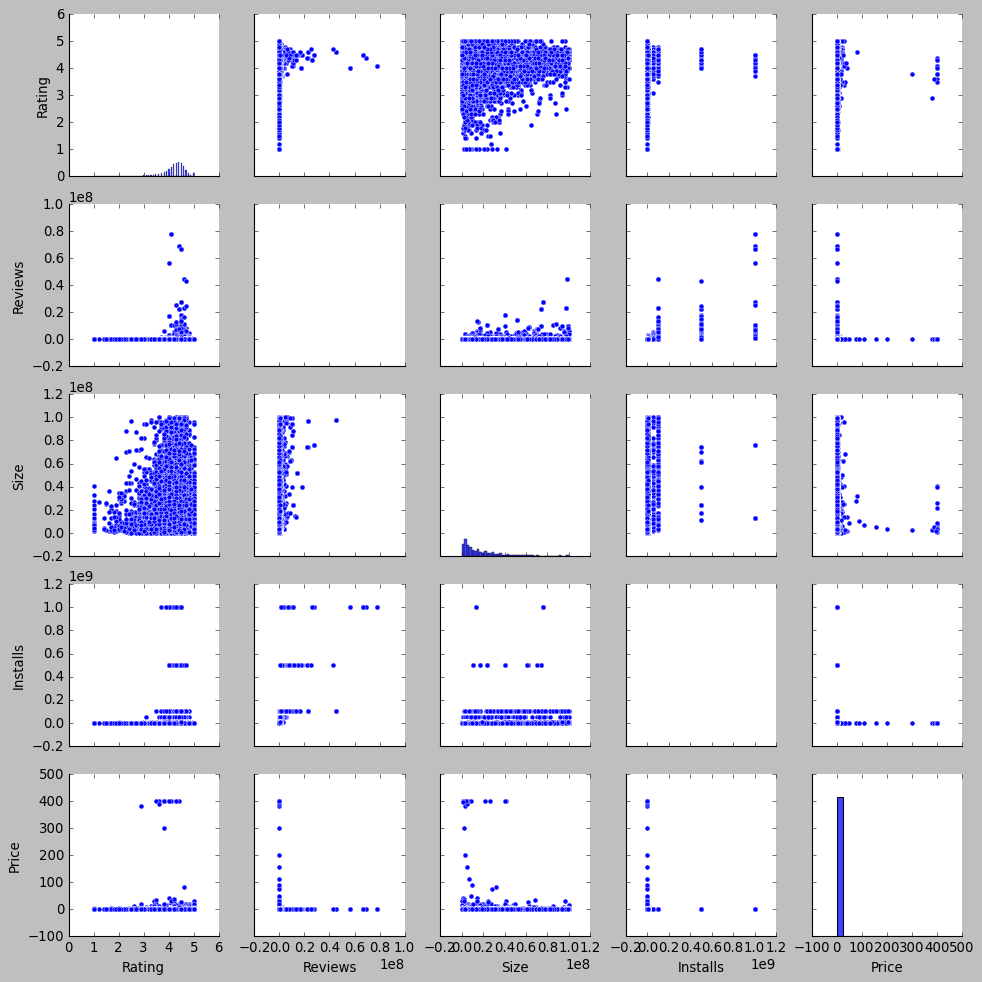

In [428]:
plt.figure(figsize=(35,30))
sns.pairplot(df_copy)
plt.show()

<Figure size 2800x2400 with 0 Axes>

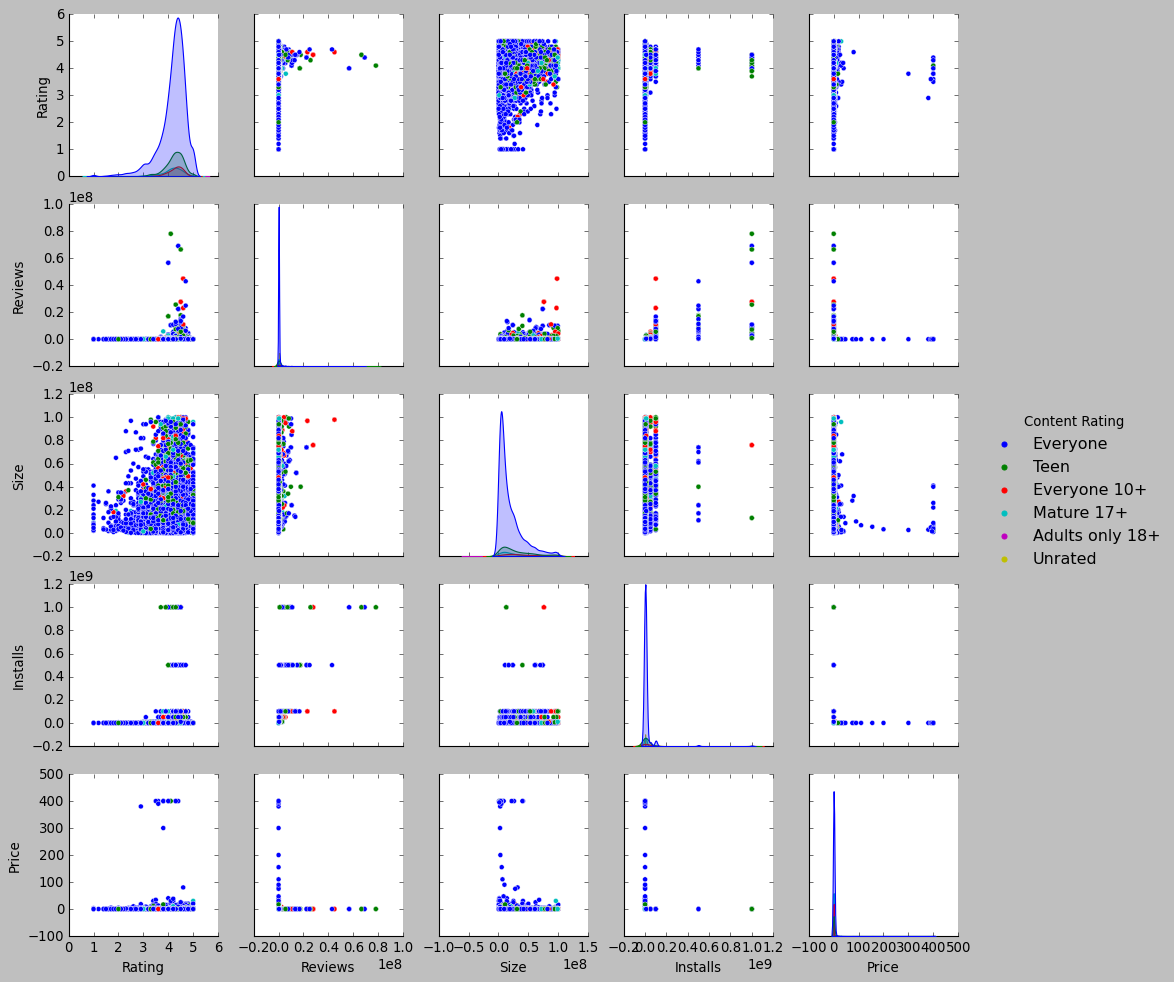

In [429]:
plt.figure(figsize=(35,30))
sns.pairplot(df_copy,hue='Content Rating')
plt.show()

<Figure size 2800x2400 with 0 Axes>

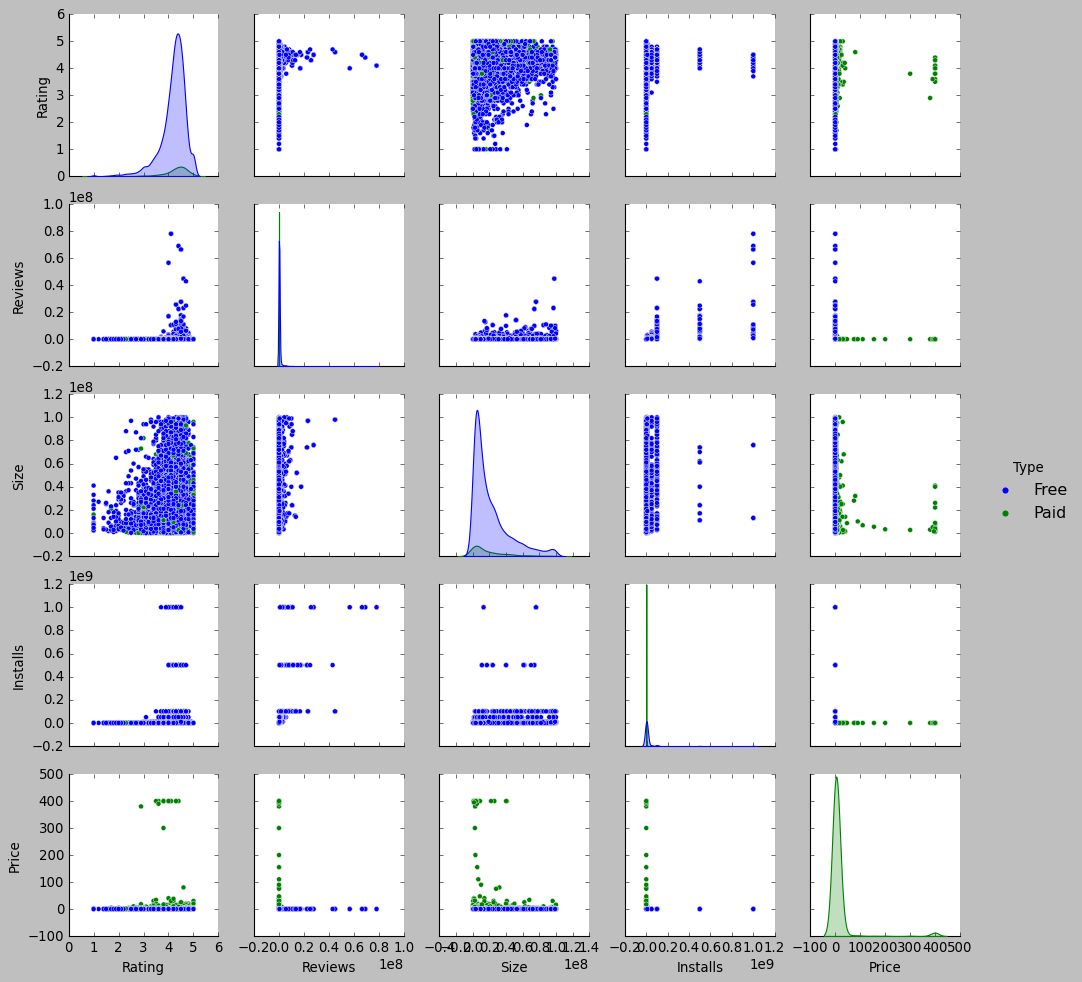

In [430]:
plt.figure(figsize=(35,30))
sns.pairplot(df_copy,hue='Type')
plt.show()

### Correlation and Heat Map

In [434]:
correlation=df_copy[num_features].corr()

In [435]:
correlation

Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.068732  0.081966  0.050886 -0.022355
Reviews   0.068732  1.000000  0.237893  0.634997 -0.009417
Size      0.081966  0.237893  1.000000  0.168872 -0.023767
Installs  0.050886  0.634997  0.168872  1.000000 -0.011147
Price    -0.022355 -0.009417 -0.023767 -0.011147  1.000000

<Axes: >

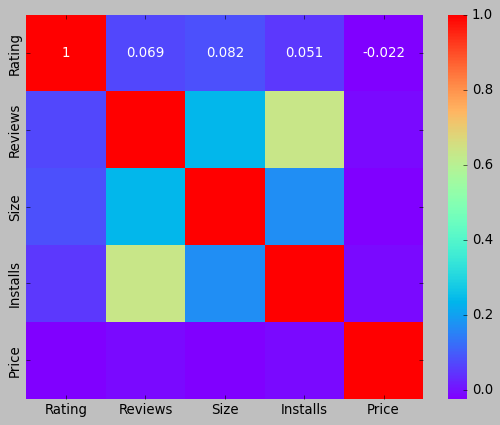

In [440]:
sns.heatmap(correlation,annot=True, cmap='rainbow')

## Detect Outliers

### Using Boxplot

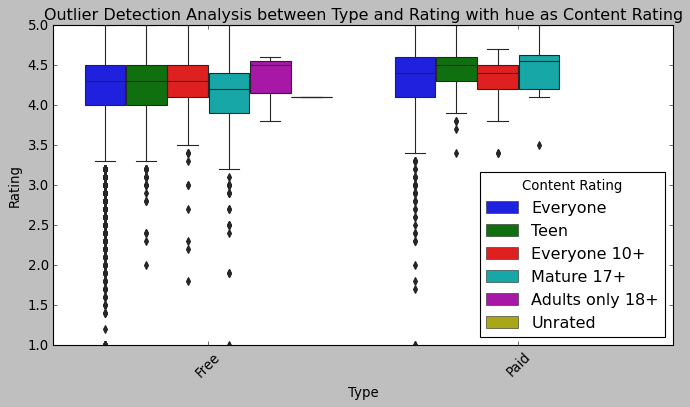

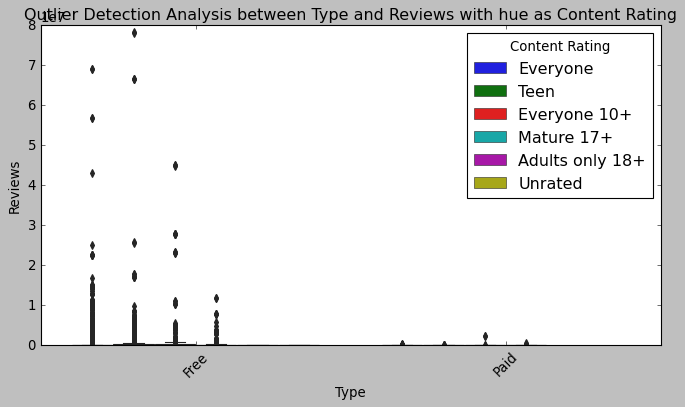

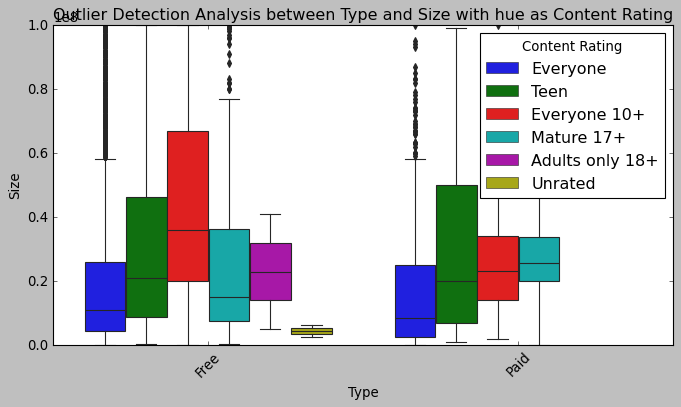

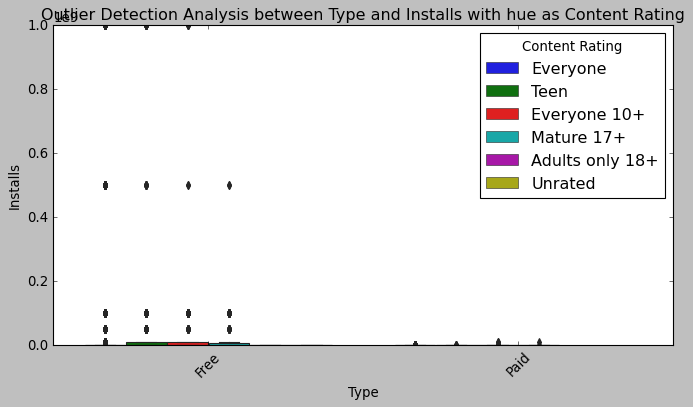

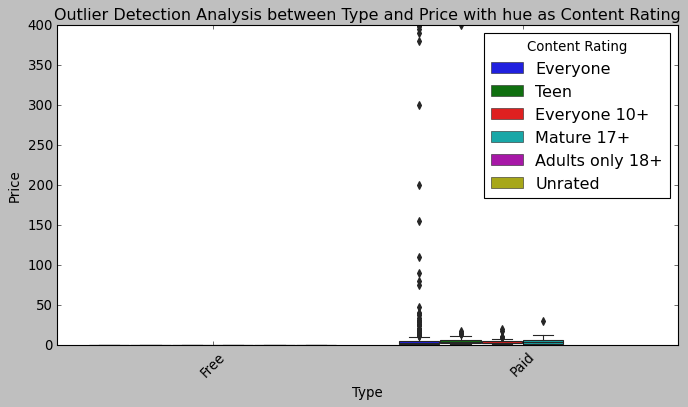

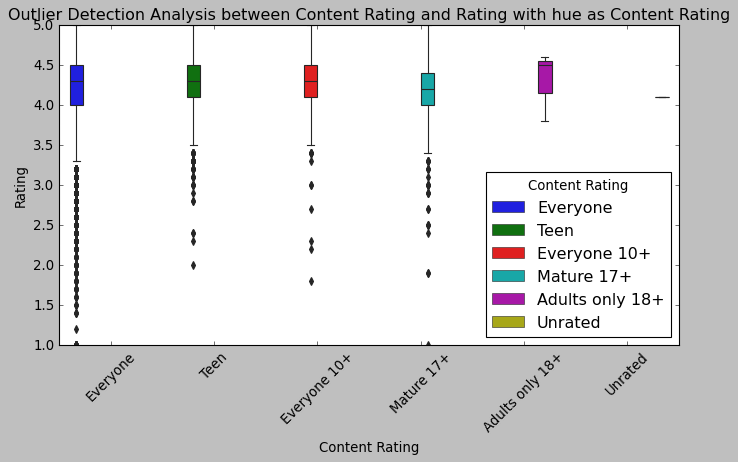

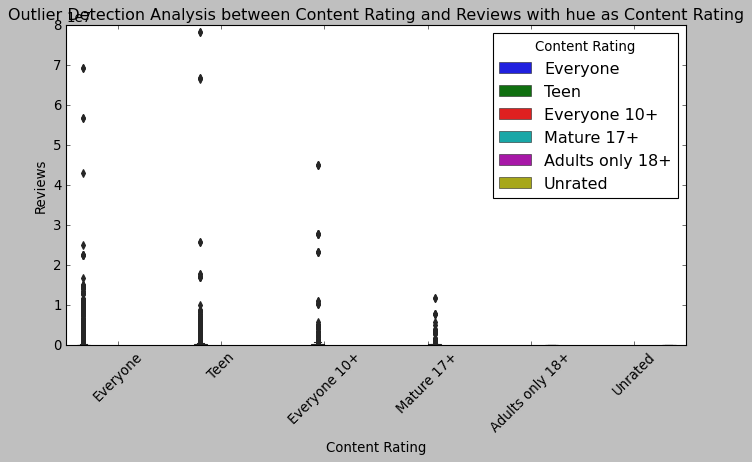

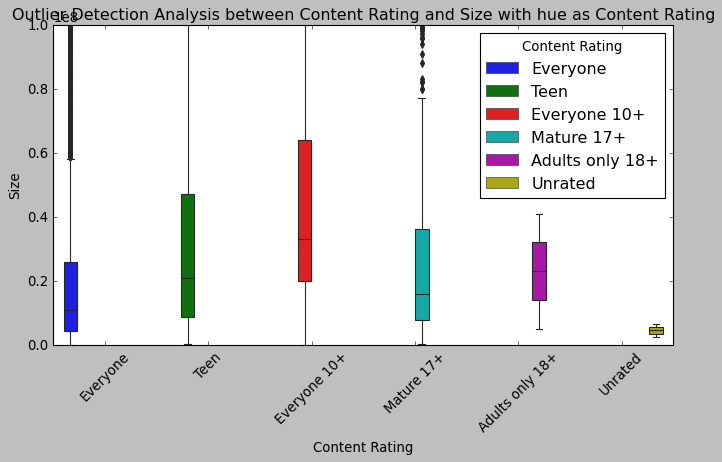

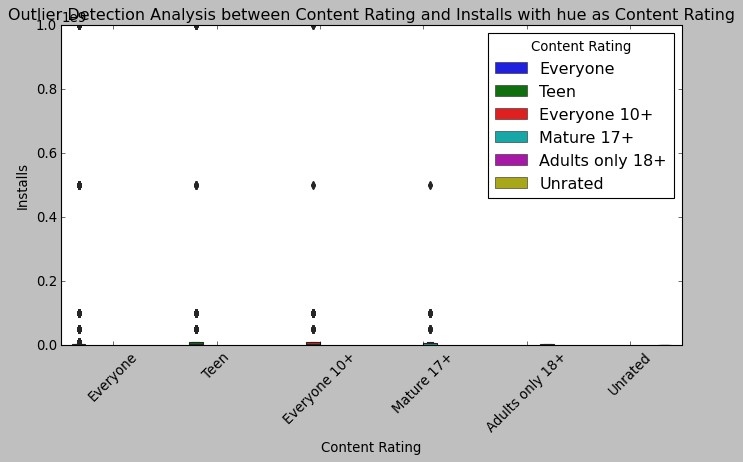

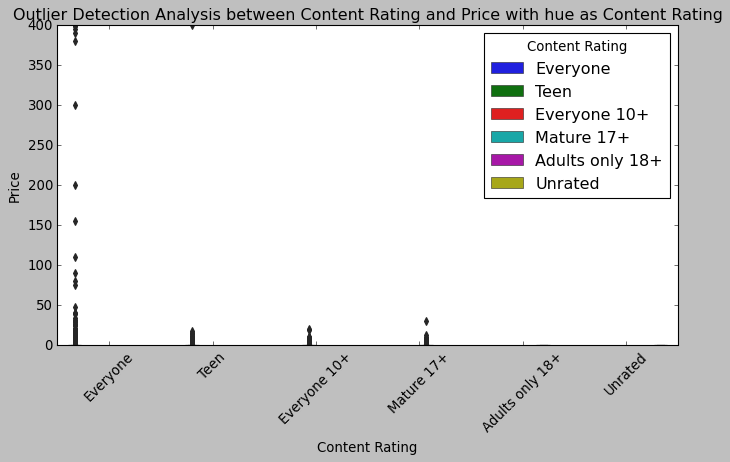

In [444]:
for i in cat_features:
    if len(df[i].unique())<10:
        for j in num_features:
            plt.figure(figsize=(10,5))
            sns.boxplot(x=df_copy[i],y=df_copy[j],hue=df_copy['Content Rating'])
            plt.xticks(rotation=45)
            plt.title(f'Outlier Detection Analysis between {i} and {j} with hue as Content Rating')
            plt.show()

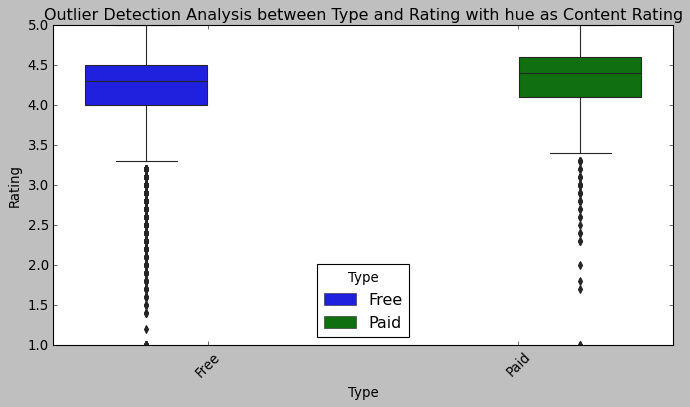

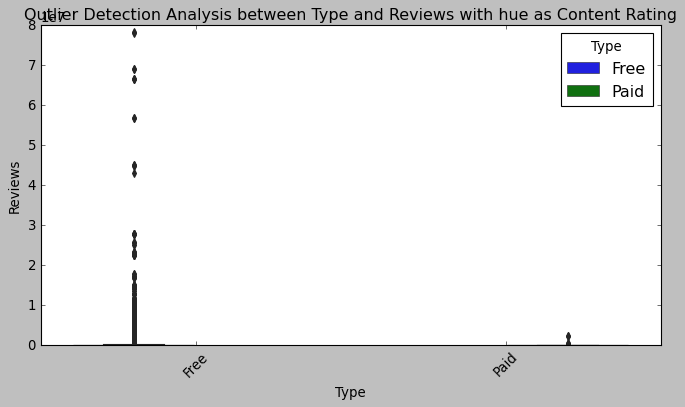

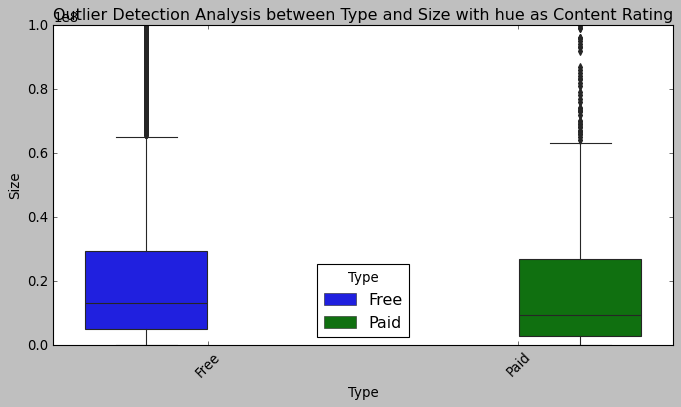

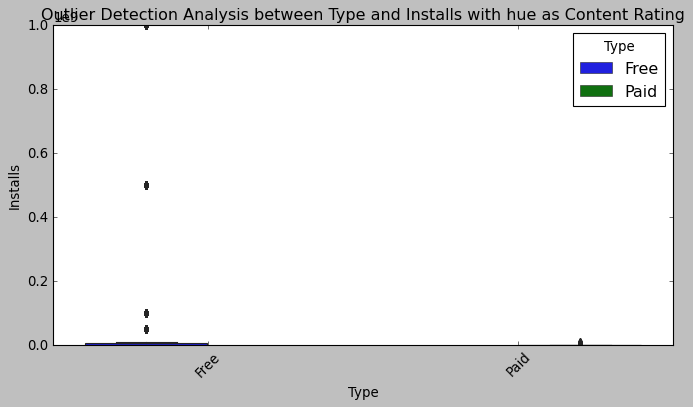

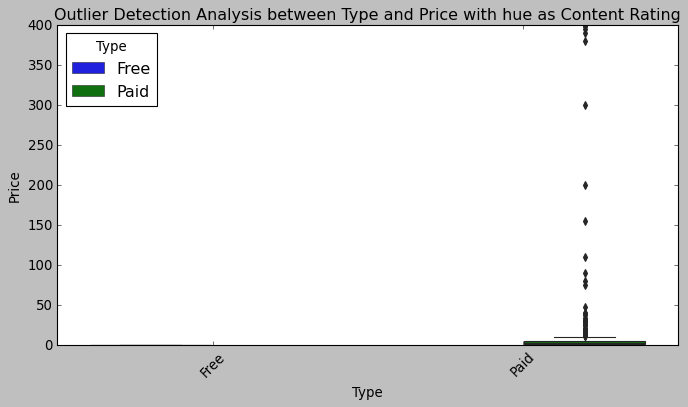

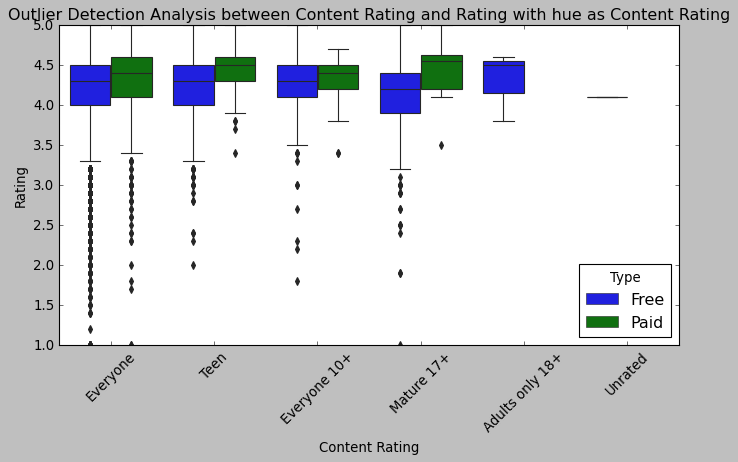

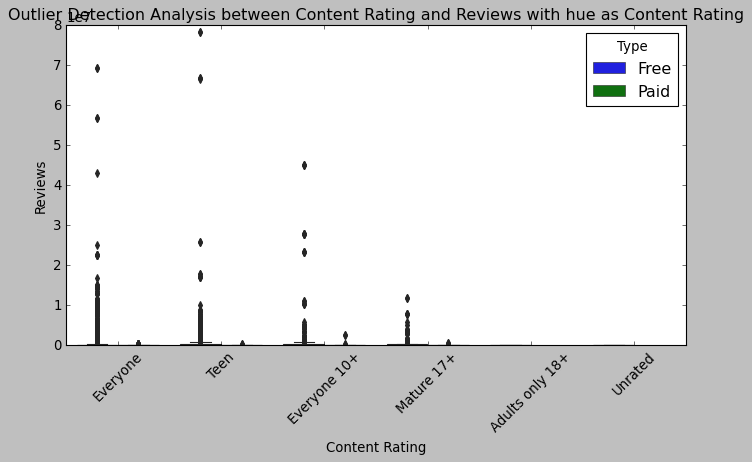

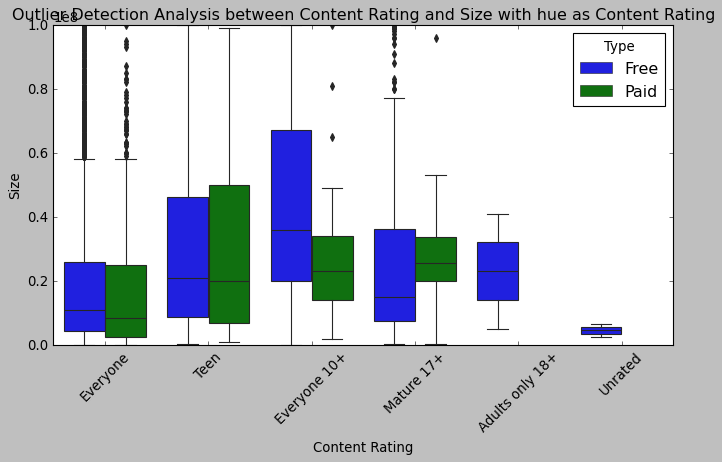

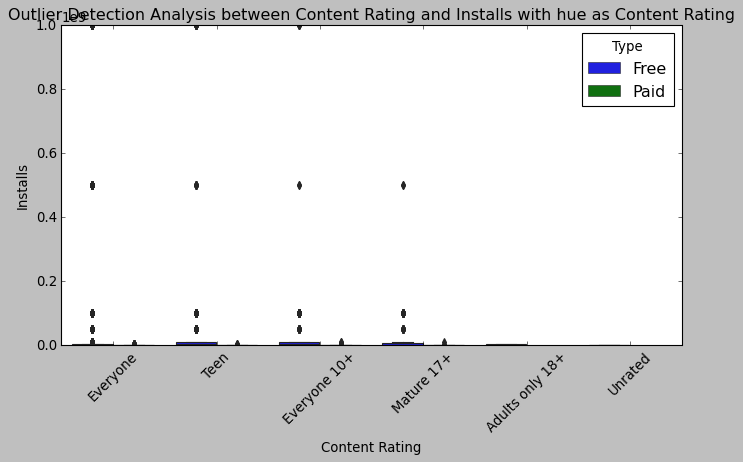

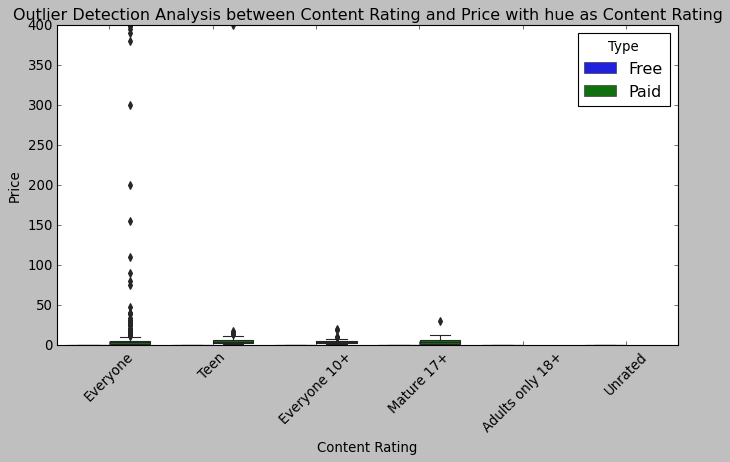

In [445]:
for i in cat_features:
    if len(df[i].unique())<10:
        for j in num_features:
            plt.figure(figsize=(10,5))
            sns.boxplot(x=df_copy[i],y=df_copy[j],hue=df_copy['Type'])
            plt.xticks(rotation=45)
            plt.title(f'Outlier Detection Analysis between {i} and {j} with hue as Content Rating')
            plt.show()

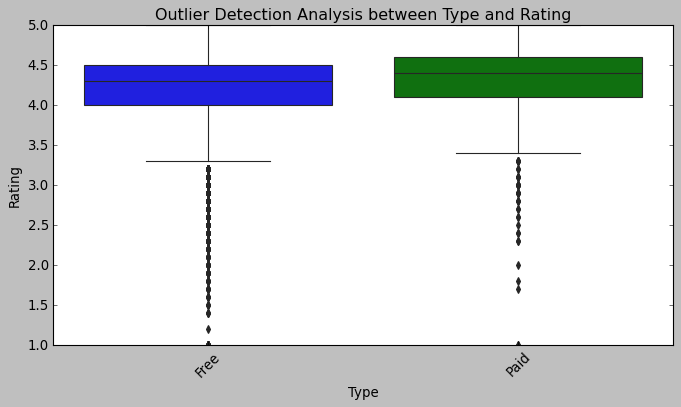

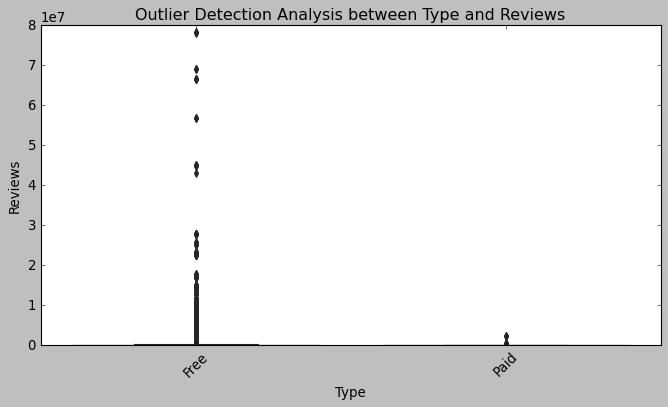

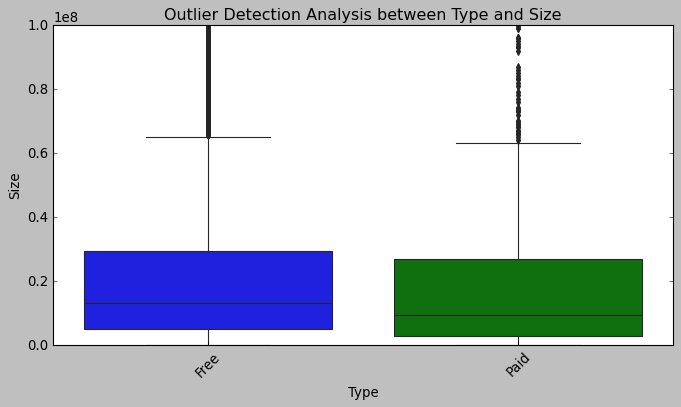

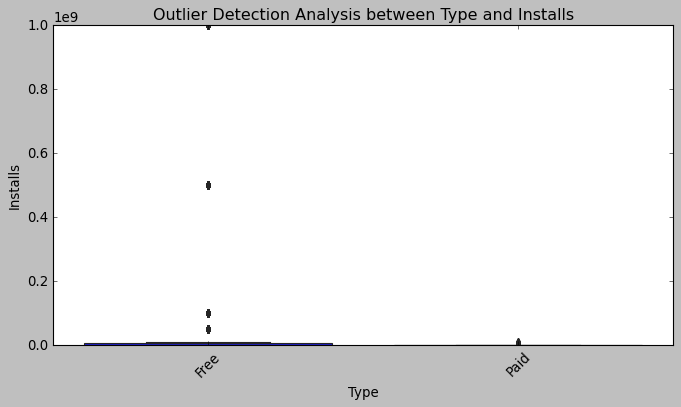

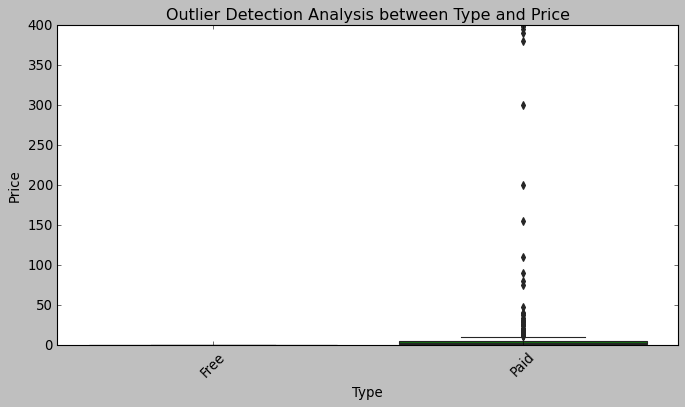

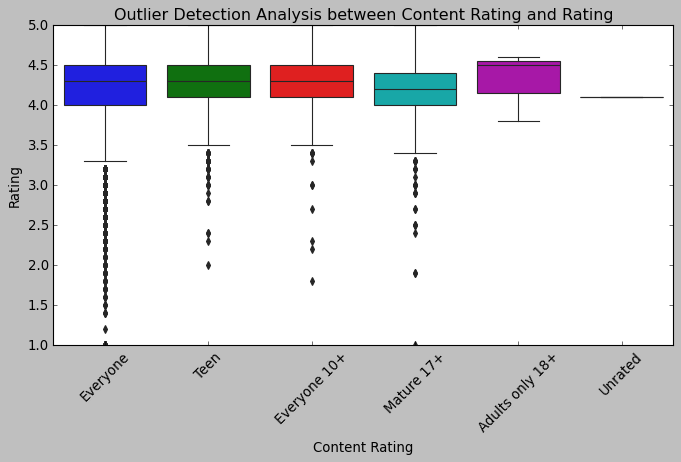

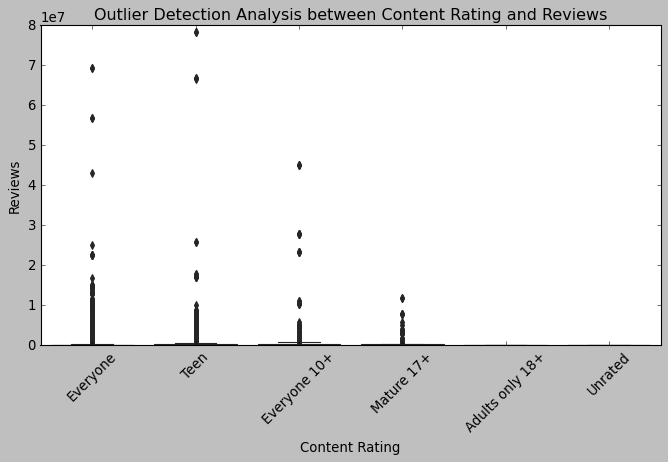

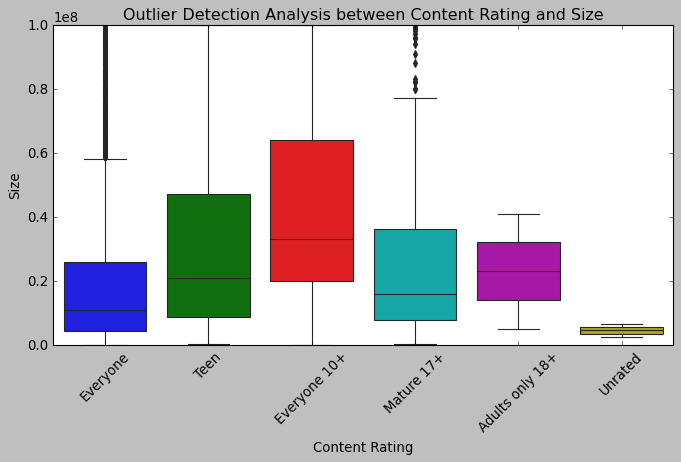

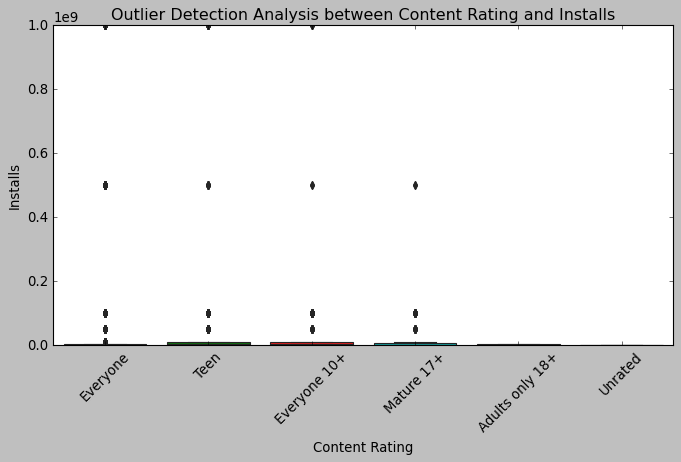

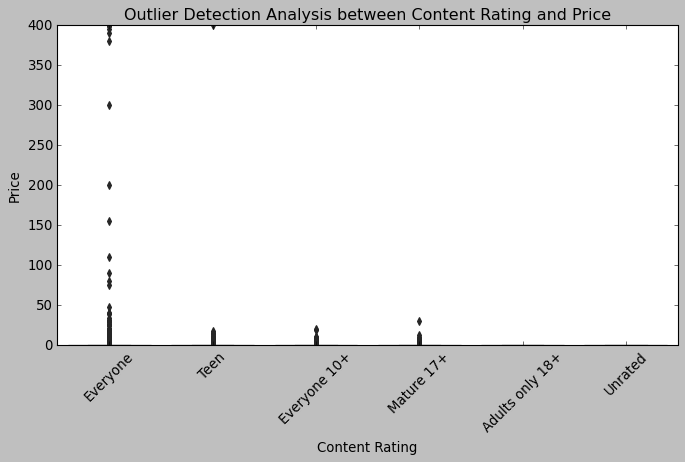

In [446]:
for i in cat_features:
    if len(df[i].unique())<10:
        for j in num_features:
            plt.figure(figsize=(10,5))
            sns.boxplot(x=df_copy[i],y=df_copy[j])
            plt.xticks(rotation=45)
            plt.title(f'Outlier Detection Analysis between {i} and {j}')
            plt.show()

## Question:

In [447]:
#1. How many categories of apps are there, plot in pie chart

In [448]:
#2. What are the top 10 categories of app?

In [449]:
#3. Which category has the highest installations?

In [450]:
#4. What are the top 5 installed apps in each popular category and type?